# 🙋‍♂️ Вступление

Добрый день(вечер, утро, ночь), здравствуйте! Это переосмысление моей проектной работы из ЯндексПрактики. Основной упор на предобработку данных и декомпозицию датасета.

> Перед нами данные по задолженности кредитного платежа. Кроме должен или нет, присуствует другая информация о возрасте и цели кредита. Требуется составить портрет того, кто берет кредит, а так же понять, кто лучше, а кто хуже возвращает кредит. Важный момент, таблицу необходимо декомпозировать. Еще создать модель скоринга, она будет учтена при построении модели машинного обучения. 

# 📚 1. Импорт

In [ ]:
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
np.set_printoptions(precision=2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 📈 2. Параметры графиков

In [ ]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
font = {'family':'DejaVu Sans',
        'weight':'normal',
        'size':12}
plt.rc('font', **font)
sns.set(rc={"figure.dpi": 300, 'savefig.dpi': 300})
sns.set_context('notebook')
sns.set_style("ticks")
FIG_FONT = dict(family="DejaVu Sans", weight="bold", color="#7f7f7f")

# 💰 3. Загрузка файла

In [ ]:
!gdown 1q8kXFmg8klXBNjXTYjuifJqouG0Ny4q4

Downloading...
From: https://drive.google.com/uc?id=1q8kXFmg8klXBNjXTYjuifJqouG0Ny4q4
To: /content/data.csv
100% 3.32M/3.32M [00:00<00:00, 154MB/s]


In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.67,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.64,покупка жилья
1,1,-4024.80,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.01,приобретение автомобиля
2,0,-5623.42,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.95,покупка жилья
3,3,-4124.75,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.55,дополнительное образование
4,0,340266.07,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.08,сыграть свадьбу


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


# 💡 4. Изучение файла и предобработка

- **children** — количество детей в семье
- **days_employed** — общий трудовой стаж в днях
- **dob_years** — возраст клиента в годах
- **education** — уровень образования клиента
- **education_id** — идентификатор уровня образования
- **family_status** — семейное положение
- **family_status_id** — идентификатор семейного положения
- **gender** — пол клиента
- **income_type** — тип занятости
- **debt** — имел ли задолженность по возврату кредитов
- **total_income** — ежемесячный доход
- **purpose** — цель получения кредита

- В таблице встречаются строчные и заглавные названия, приведем все значнеия в нижний регистр.

In [ ]:
df = df.apply(lambda x: x.str.lower() if x.dtype=='object' else x)

## 4.1 Проверка пропущенных значений

In [ ]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [ ]:
len(df[df.isnull().any(1)])

2174

- Обанружено 2174 пропусков в столбцах days_employed и total_income. Пропуски связаны попарно.

## 4.2 Проверка на дубликаты

In [ ]:
df.duplicated().sum()

71

In [ ]:
df = df.drop_duplicates()

- Найдено 71 явных дубликата, удалим их.

## 4.3 Поиск аномальных значений

In [ ]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21454.00,19351.00,21454.00,21454.00,21454.00,21454.00,19351.00
mean,0.54,63046.50,43.27,0.82,0.97,0.08,167422.30
std,1.38,140827.31,12.57,0.55,1.42,0.27,102971.57
min,-1.00,-18388.95,0.00,0.00,0.00,0.00,20667.26
25%,0.00,-2747.42,33.00,1.00,0.00,0.00,103053.15
50%,0.00,-1203.37,42.00,1.00,0.00,0.00,145017.94
75%,1.00,-291.10,53.00,1.00,1.00,0.00,203435.07
max,20.00,401755.40,75.00,4.00,4.00,1.00,2265604.03


### 4.3.1 Сhildren

- **children** имеет отрицательные значения чего быть не может, уберем знак минус.

In [ ]:
df['children'] = df['children'].abs().astype(int)

### 4.3.2 Days Employed

- **days_employed** имют отрицательные значения, чего быть не должно. 

- Переведем значения в годы создадим отдельный столбец **year_employed**

- в столбце есть аномально высокие значения, они связаны с категорией **пенсионеры**, примедем все значения к максимальному стажу **в 60 лет**

- **Удалим** столбец **days_employed** из таблицы

In [ ]:
df['year_employed'] = (df['days_employed'].abs() / 365).round().apply(lambda x: 60 if x > 59 else x)

In [ ]:
df = df.drop(columns=['days_employed'], axis=1)

### 4.3.3 Dob Years

- **dob_years** имеет значения возраста клиента меньше 18, **удалим** из таблицы **всех несовершеннолетних**

In [ ]:
df = df[df['dob_years'] >= 18]

### 4.3.4 Total Income

- **total_income** имеет очень жирный хвост, отфильтруем таблицу по процентилям, но сначала нужно решить какой процент выбрать.

In [ ]:
pct_filter = np.nanpercentile(df['total_income'], [100, 99,98,97])
pct_filter

array([2265604.03,  518476.62,  435327.32,  390421.85])

In [ ]:
# Функции графиков

def multi_boxplot(df=df, 
                   x1=None, x2=None, x3=None, x4=None,
                   xlabel1=None, xlabel2=None, xlabel3=None, xlabel4=None
                  ):
   
    plt.figure(figsize=(14, 6))
    
    ax1 = plt.subplot(2, 2, 1)
    sns.boxplot(data=df, x=x1, ax=ax1)
    plt.xlabel('___________________')
    plt.title(xlabel1)
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    sns.boxplot(data=df, x=x2, ax=ax2)
    plt.xlabel('___________________')
    plt.title(xlabel2)
    ax3 = plt.subplot(2, 2, 3)
    sns.boxplot(data=df, x=x3, ax=ax3)
    plt.xlabel('___________________')
    plt.title(xlabel3)
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    sns.boxplot(data=df, x=x4, ax=ax4)
    plt.xlabel('___________________')
    plt.title(xlabel4)
    plt.tight_layout()
    sns.despine(bottom=True, left=True)
    plt.show()

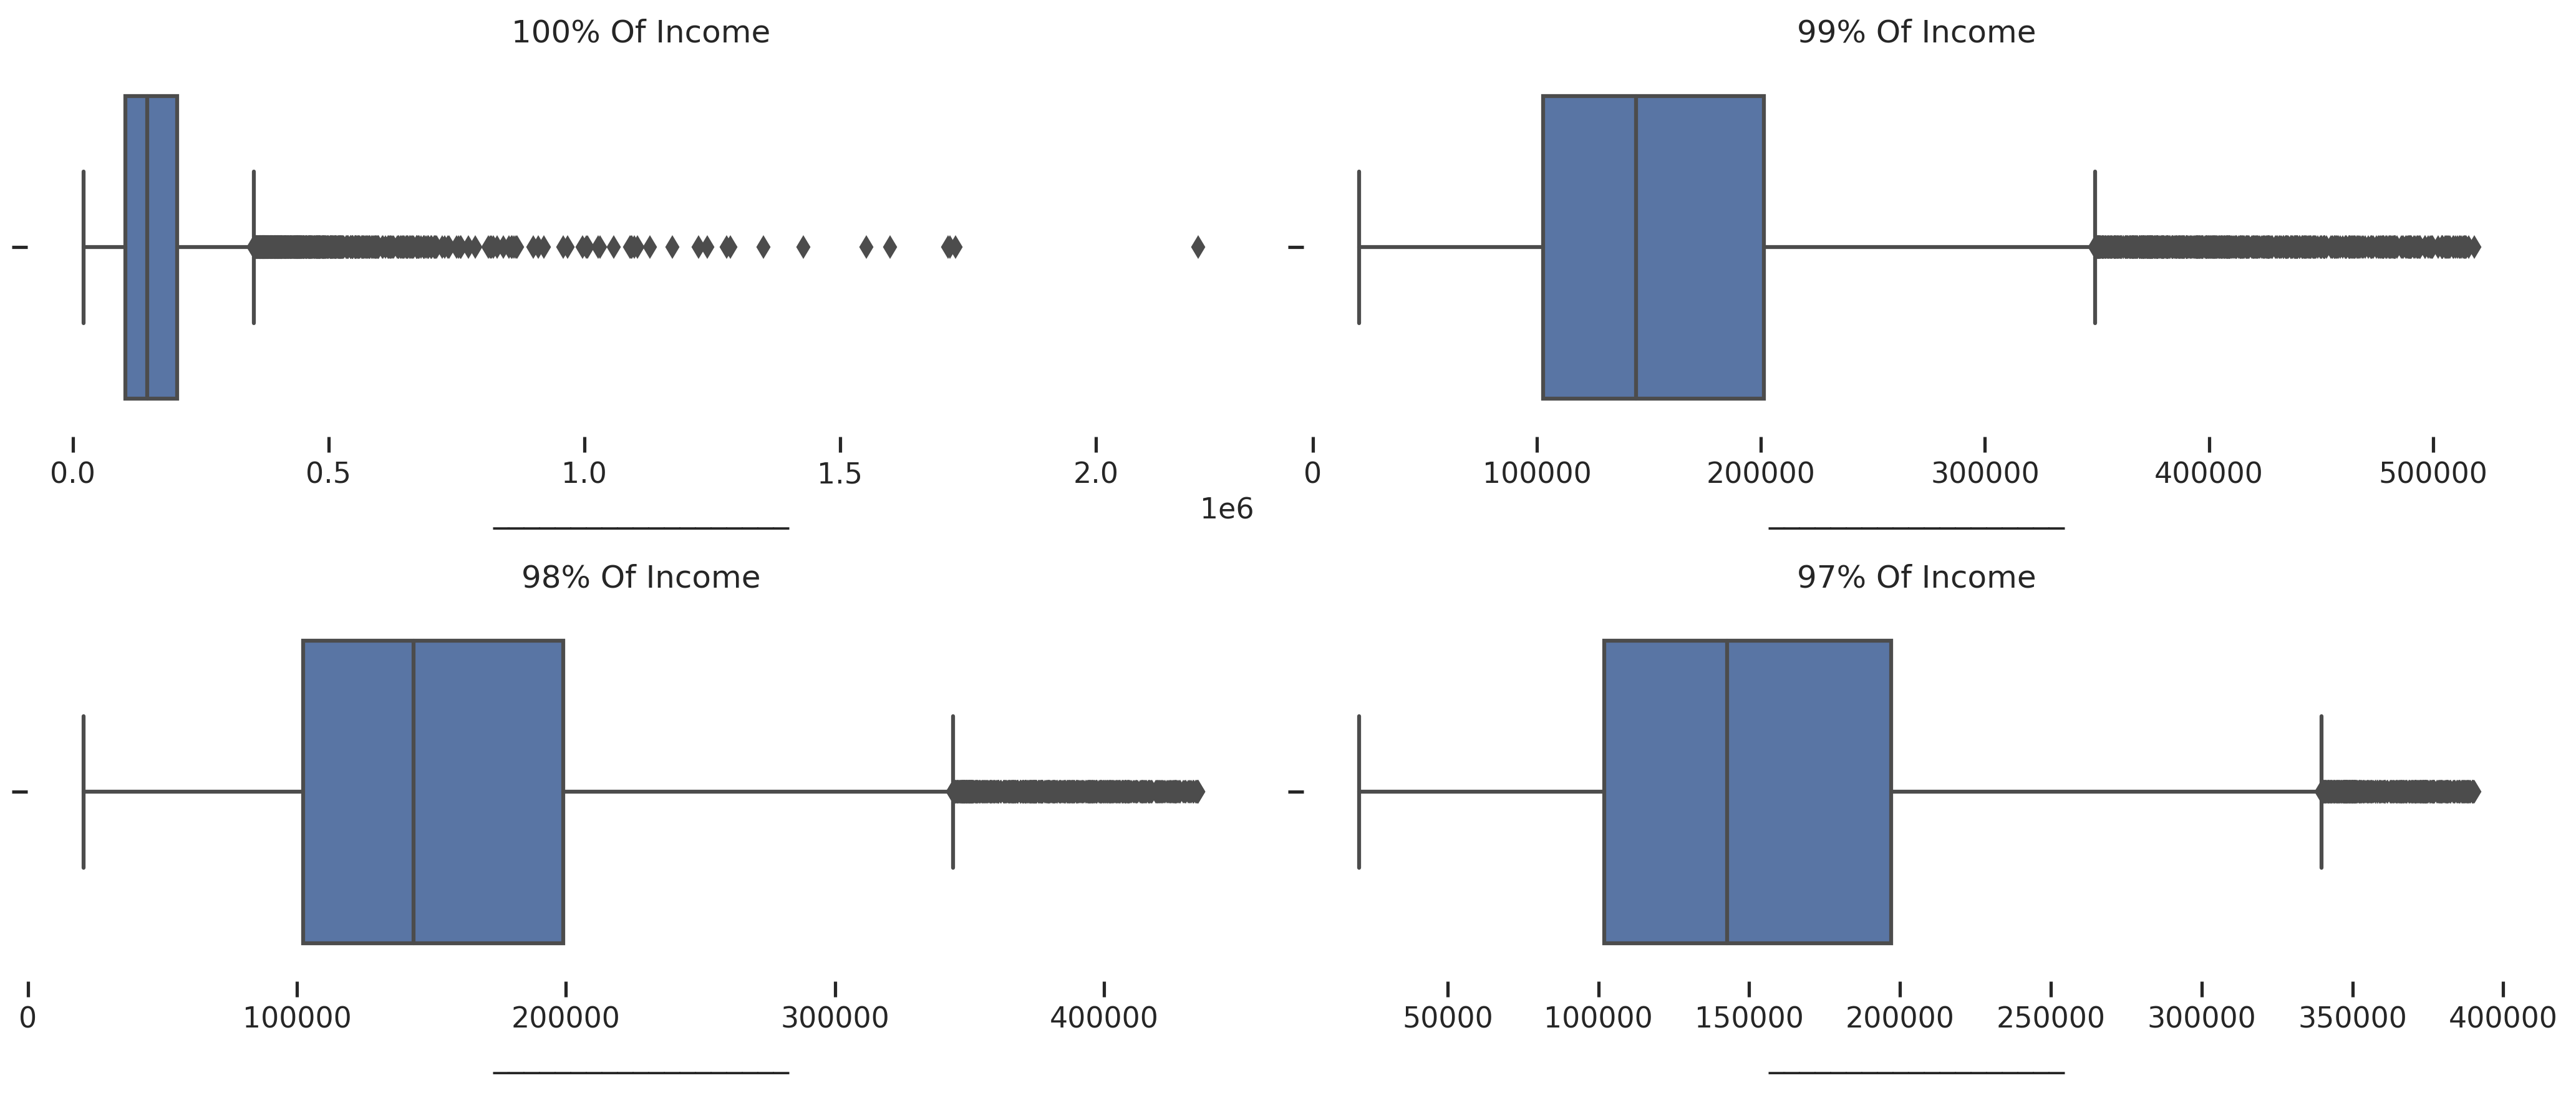

In [ ]:
multi_boxplot(
    x1=df.query('total_income < @pct_filter[0]')['total_income'],
    x2=df.query('total_income < @pct_filter[1]')['total_income'],
    x3=df.query('total_income < @pct_filter[2]')['total_income'],
    x4=df.query('total_income < @pct_filter[3]')['total_income'],
    xlabel1="100% Of Income",
    xlabel2='99% Of Income',
    xlabel3='98% Of Income',
    xlabel4='97% Of Income'
)

- на 99% уже значительно видны улучшения, хвотс заметно уменьшился. 
- выберем 98%, хвост в два раза меньше чем у 99%, и не слишком сильно отличается от 97%

## 4.4 Заполнения пропусков

- Заполним значения **year_employed** медианой в зависимоти от **income_type**
- Заполним значения **total_income** медианой.

In [ ]:
df['year_employed'] = df['year_employed'].fillna(df.groupby('income_type')['year_employed'].transform('mean').round()).astype(int)
df['total_income'] = df['total_income'].fillna(df['total_income'].mean()).round().astype(int)

## 4.5 Исследование клонок **object**

In [ ]:
df[['education', 'education', 'family_status', 'gender', 'purpose']].head()

,education,education,family_status,gender,purpose
0,высшее,высшее,женат / замужем,f,покупка жилья
1,среднее,среднее,женат / замужем,f,приобретение автомобиля
2,среднее,среднее,женат / замужем,m,покупка жилья
3,среднее,среднее,женат / замужем,m,дополнительное образование
4,среднее,среднее,гражданский брак,f,сыграть свадьбу


### 4.5.1 Education

In [ ]:
df['education'].value_counts().reset_index()

,index,education
0,среднее,15108
1,высшее,5215
2,неоконченное высшее,742
3,начальное,282
4,ученая степень,6


- Больше всего кредиторов имеют **среднее** образование

### 4.5.2 Family Status

In [ ]:
df['family_status'].value_counts().reset_index()

,index,family_status
0,женат / замужем,12290
1,гражданский брак,4130
2,не женат / не замужем,2794
3,в разводе,1185
4,вдовец / вдова,954


- Больше всего кредитов у **женатых/замужних** пар.

### 4.5.3 Income Type

In [ ]:
df['income_type'].value_counts().reset_index()

,index,income_type
0,сотрудник,11029
1,компаньон,5058
2,пенсионер,3809
3,госслужащий,1451
4,безработный,2
5,предприниматель,2
6,студент,1
7,в декрете,1


- Следует **удалить** данные которых слишком мало это категории **безработный/студент/в декрете/предприниматель**

In [ ]:
df = df.drop(df[df['income_type'] == 'безработный'].index)
df = df.drop(df[df['income_type'] == 'студент'].index)
df = df.drop(df[df['income_type'] == 'в декрете'].index)
df = df.drop(df[df['income_type'] == 'предприниматель'].index)

### 4.5.4 Gender

In [ ]:
df['gender'].value_counts().reset_index()

,index,gender
0,f,14099
1,m,7247
2,xna,1


- В таблице **женщин** больше в 2 раза
- Неизвестный формат "XNA", удалим строку

In [ ]:
df = df.drop(df[df['gender'] == 'xna'].index)

### 4.5.5 Purpose

In [ ]:
df['purpose'].value_counts().reset_index().tail()

,index,purpose
33,получение дополнительного образования,444
34,получение образования,441
35,профильное образование,435
36,получение высшего образования,424
37,заняться образованием,407


- 38 уникальных значений, но цель можно обобщить на **свадьба/авто/недвижимость/образование**

### 4.5.6 Фильтр по 98 процентилю и создание ID

In [ ]:
df = df.query('total_income < @pct_filter[2]').reset_index(drop=True)
df['id'] = pd.Series(random.sample(range(111111, 999999), len(df)))
df.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,year_employed,id
0,1,42,высшее,0,женат / замужем,0,f,сотрудник,0,253876,покупка жилья,23,223264
1,1,36,среднее,1,женат / замужем,0,f,сотрудник,0,112080,приобретение автомобиля,11,621720
2,0,33,среднее,1,женат / замужем,0,m,сотрудник,0,145886,покупка жилья,15,586038
3,3,32,среднее,1,женат / замужем,0,m,сотрудник,0,267629,дополнительное образование,11,866165
4,0,53,среднее,1,гражданский брак,1,f,пенсионер,0,158616,сыграть свадьбу,60,294388


# 📁 5 Категоризация и декомпозиция

- создадим столбцы с булевым значением для children, education, family_status, income_type
- определим категории для total_income, purpose

## 5.1 Булевы значения

- создадим **булевы значения** для следущих колонок талицы: **children/education/family_status/income_type**

### 5.1.1 Children

- Есть ли дети - 0(нет) и 1(есть)

In [ ]:
df['children_bool'] = df['children'].apply(lambda x: 1 if x > 0 else 0)

### 5.1.2 Education

- Есть ли высшее образование - 0(нет) и 1(есть).

In [ ]:
df['education_bool'] = df['education'].apply(lambda x: 1 if x == 'высшее' else 0)

### 5.1.3 Family Status

- Есть ли муж/жена - 0(одинок) и 1 (есть пара)

In [ ]:
df['family_status_bool'] = df['family_status'].apply(lambda x: 1 if x == 'женат / замужем' 
                                                     or x == 'гражданский брак' else 0)

### 5.1.4 Income Type

- Есть ли работа - 0(не работает) и 1(работа есть)

In [ ]:
df['income_type_bool'] = df['income_type'].apply(lambda x: 0 if x == 'пенсионер' else 1)

## 5.2 Категоризация

- Создадим категории **total_income** с помощью pd.qut, нам нужно разделить на различные по размеру группы A, B, C, D, E . 

- **Заменим** столбец **purpose** на обобщенные категории свадьба/авто/недвижимость/образование

### 5.2.1 Total Income

- Разделим доходы на 5 категорий **A, B, C, D, E** где А самый высокий доход и E самый низкий.

In [ ]:
df['total_income_category'] = pd.cut(df["total_income"], 5, labels=['E', 'D', 'C', 'B', 'A'])
df['total_income_category'].value_counts().reset_index()

,index,total_income_category
0,D,10514
1,E,4872
2,C,3809
3,B,1320
4,A,446


- ожидаемо кредиторов с более высоким доходом меньше чем с более низким
- категория Е не первая по количеству заемщиков

### 5.2.2 Purpose

In [ ]:
# Ищет часть слова и если оно есть, подставляет заданое значение
    
def purpose_cat(row):
    if 'авто' in row:
        return 'операции с автомобилем'
    if 'жил' in row or 'виж' in row:
        return 'операции с недвижимостью'
    if 'свад' in row:
        return 'проведение свадьбы'
    if 'обра' in row:
        return 'получение образования'
    else:
        return 'ошибка'

In [ ]:
df['purpose'] = df['purpose'].apply(purpose_cat)
df['purpose'].value_counts().reset_index()

,index,purpose
0,операции с недвижимостью,10553
1,операции с автомобилем,4205
2,получение образования,3931
3,проведение свадьбы,2272


- Подавляющее большинство берут кредит для покупки недвижимости

## 5.3 Создание словарей

In [ ]:
df['purpose_id'] = df.groupby('purpose').ngroup()
df['income_type_id'] = df.groupby('income_type').ngroup()
df['gender_id'] = df.groupby('gender').ngroup()
df['total_income_category_id'] = df.groupby('total_income_category').ngroup()

In [ ]:
education_dict = df[['education_id', 'education']]
family_dict = df[['family_status_id', 'family_status']]
purpose_dict = df[['purpose_id', 'purpose']]
income_type_dict = df[['income_type_id', 'income_type']]
gender_dict = df[['gender_id', 'gender']]
total_income_category_dict = df[['total_income_category_id', 'total_income_category']]

In [ ]:
education_dict = education_dict.drop_duplicates().reset_index(drop=True)
family_dict = family_dict.drop_duplicates().reset_index(drop=True)
purpose_dict = purpose_dict.drop_duplicates().reset_index(drop=True)
income_type_dict = income_type_dict.drop_duplicates().reset_index(drop=True)
gender_dict = gender_dict.drop_duplicates().reset_index(drop=True)
total_income_category_dict = total_income_category_dict.drop_duplicates().reset_index(drop=True)

In [ ]:
income_type_dict

,income_type_id,income_type
0,3,сотрудник
1,2,пенсионер
2,1,компаньон
3,0,госслужащий


## 5.4 Таблицa булевых значений 

In [ ]:
bool_table = df[['id', 'children_bool', 'education_bool',
       'family_status_bool', 'income_type_bool', 'debt']]

In [ ]:
bool_table.head()

,id,children_bool,education_bool,family_status_bool,income_type_bool,debt
0,223264,1,1,1,1,0
1,621720,1,0,1,1,0
2,586038,0,0,1,1,0
3,866165,1,0,1,1,0
4,294388,0,0,1,0,0


## 5.5 Удаление и сортировка колонок

- удалим колонки 'education', 'gender', 'family_status', 'income_type', 'purpose', 'children_bool', 'education_bool', 'family_status_bool', 'income_type_bool', 'total_income_category', 'purpose'
- удалим новые колонки с булевым значением
- отсортируем столбцы для удобства

In [ ]:
df = df.drop(columns=['education', 'gender', 'family_status',
                      'income_type', 'purpose', 'children_bool', 
                      'education_bool', 'family_status_bool', 
                      'income_type_bool', 'total_income_category', 
                      'purpose'], axis=1)

In [ ]:
df = df[['id', 'children', 'dob_years', 'year_employed', 
       'total_income',  'debt', 'education_id',
       'family_status_id', 'purpose_id', 'income_type_id', 
       'gender_id', 'total_income_category_id' ]]

In [ ]:
df.head()

,id,children,dob_years,year_employed,total_income,debt,education_id,family_status_id,purpose_id,income_type_id,gender_id,total_income_category_id
0,223264,1,42,23,253876,0,0,0,1,3,0,2
1,621720,1,36,11,112080,0,1,0,0,3,0,1
2,586038,0,33,15,145886,0,1,0,1,3,1,1
3,866165,3,32,11,267629,0,1,0,2,3,1,2
4,294388,0,53,60,158616,0,1,1,3,2,0,1


# 🔎 6. Анализ даных

Мы будем анализировать данные с помошью графиков.

- Для категориальных данных, будем использовать **bar plot** и **pie chart**.
- Для числовых данных, будем использовать **box plot** и **histogram**.

In [ ]:
# Функции графиков

def univariate_multi_plot(df=df, x=None, xlabel=None, explode=None, rotation=None):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.countplot(data=df, x=x, ax=ax[0], order=df[x].value_counts(ascending=True).index)
    df[x].value_counts(ascending=True).plot(kind="pie", autopct="%1.1f%%", ax=ax[1], explode=explode)
    sns.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=rotation, horizontalalignment='center')
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    ax[0].bar_label(ax[0].containers[0], label_type='edge', size=12, padding=1, fontname="DejaVu Sans", 
                    color="#7f7f7f")
    fig.text(0.5, 1, f'{xlabel} Distribution', size=16, fontdict=FIG_FONT, ha="center", va="center")
    plt.show()

def univariate_numerical_plot(df=df, x=None, xlabel=None, bar_label=True):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.histplot(data=df, x=x, kde=True, ax=ax[0])
    sns.boxplot(data=df, x=x, ax=ax[1])
    sns.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    ax[1].set_xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    fig.text(0.5, 1, f'{xlabel} Distribution', size=16, fontdict=FIG_FONT, ha="center", va="center")
    plt.show()

## 6.1 Одномерный анализ

- Проанализируем следущие категории: education / family_status / purpose / income_type	/ gender / total_income_category / children_bool

### 6.1.1 Education

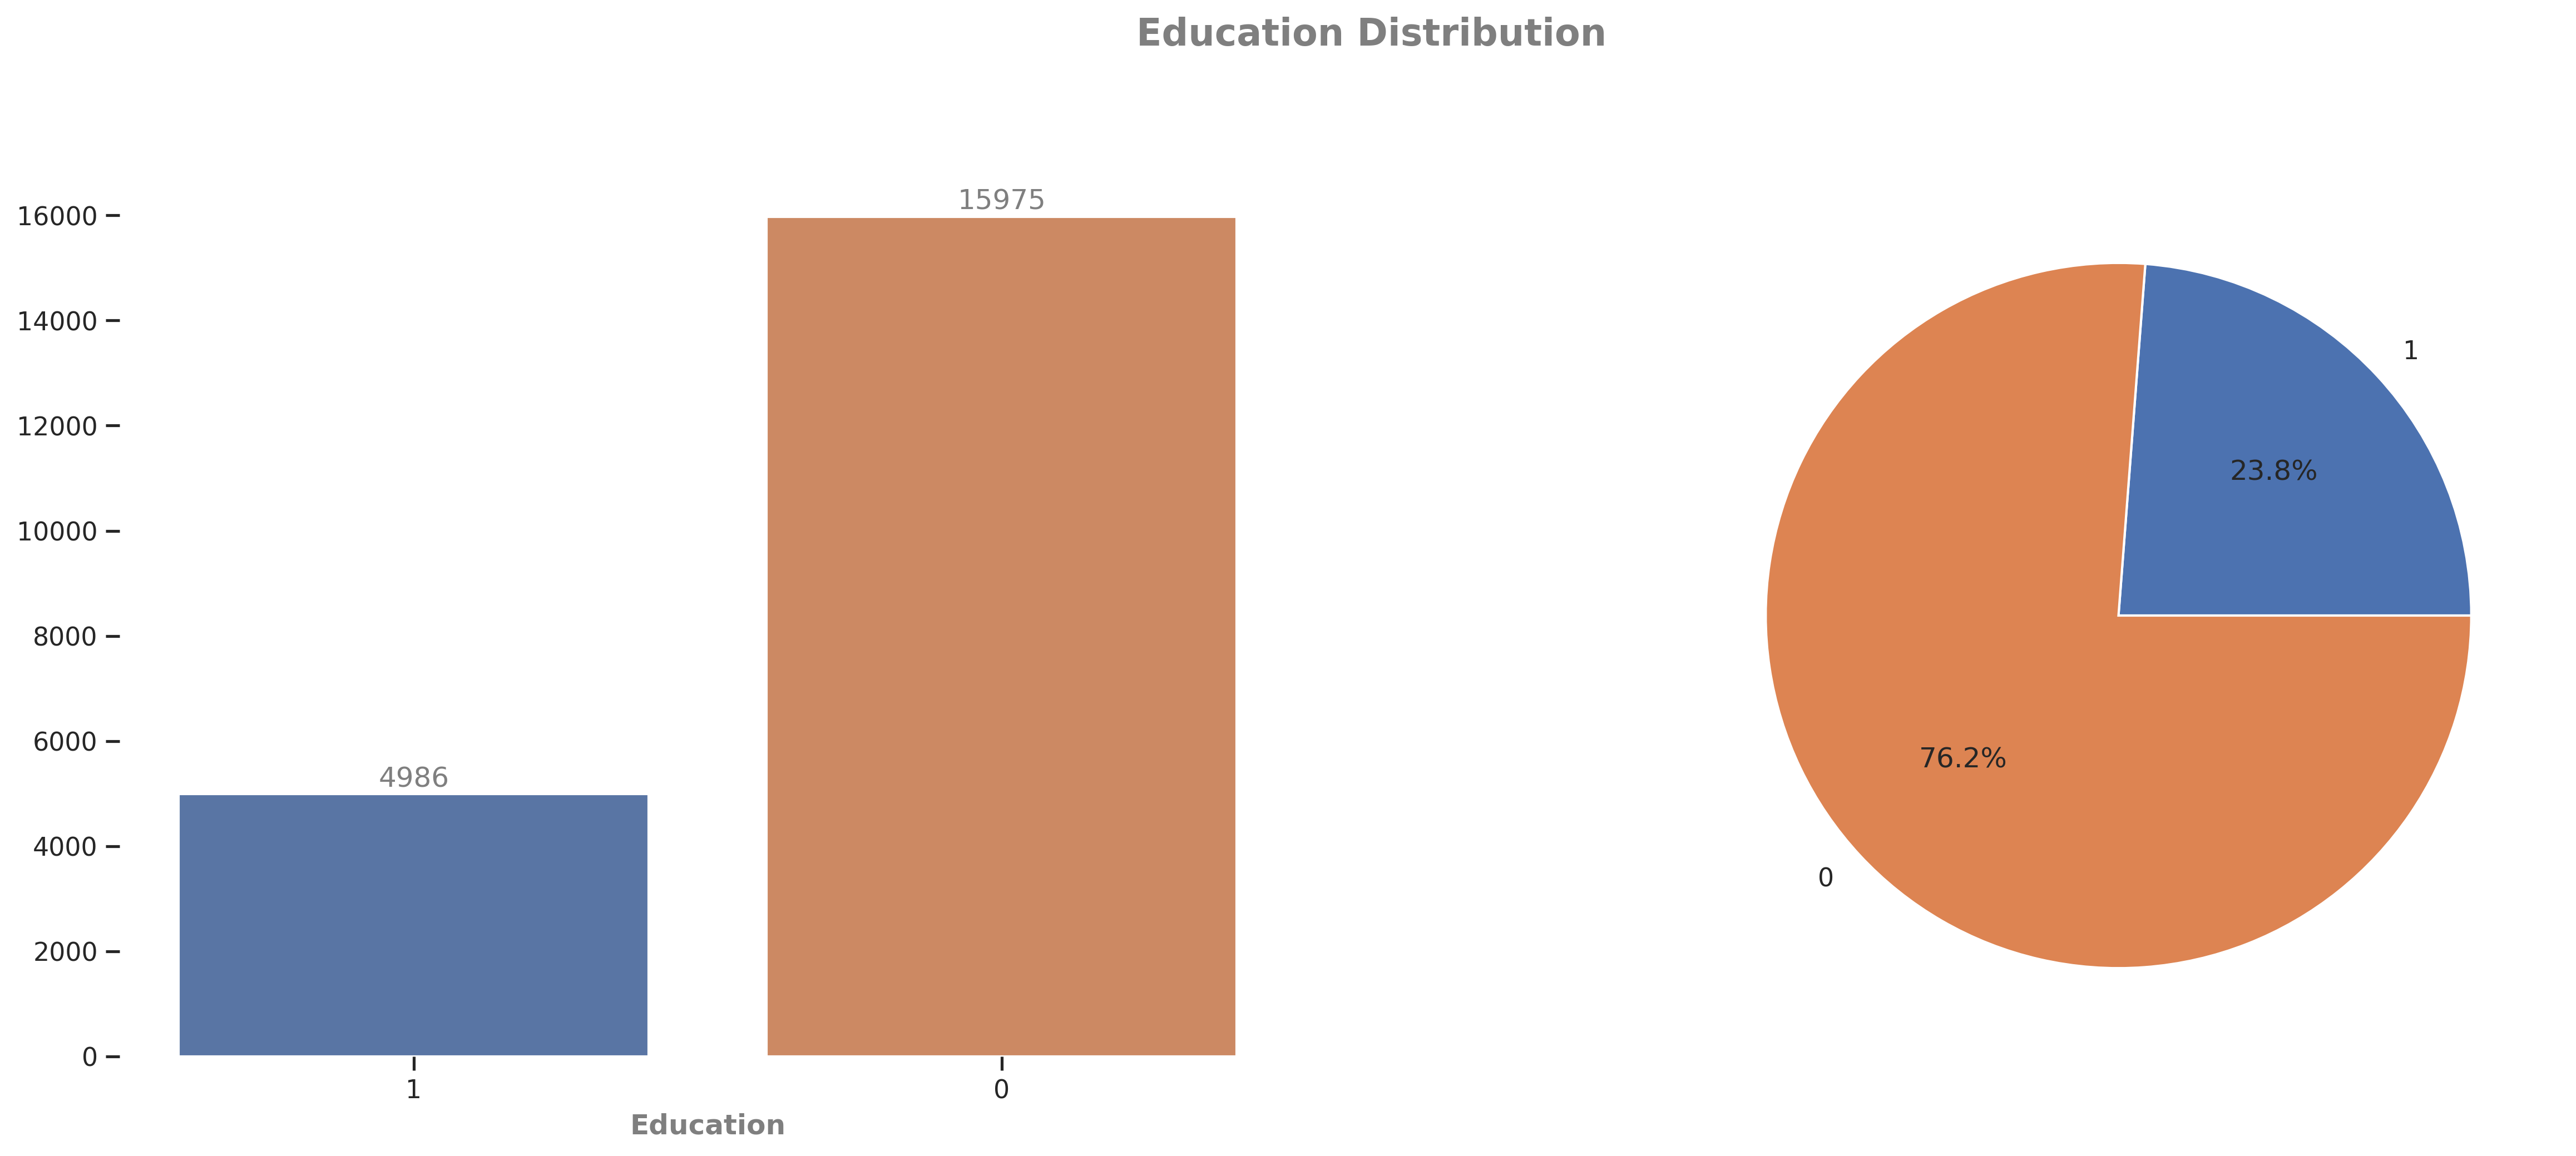

In [ ]:
t = df.merge(bool_table[['id', 'education_bool']], on='id')
univariate_multi_plot(df=t, x="education_bool", xlabel="Education")

- Подавляющее большинство тех кто берет кредиты, имеют среднее образование - 76.2%

### 6.1.2 Family Status

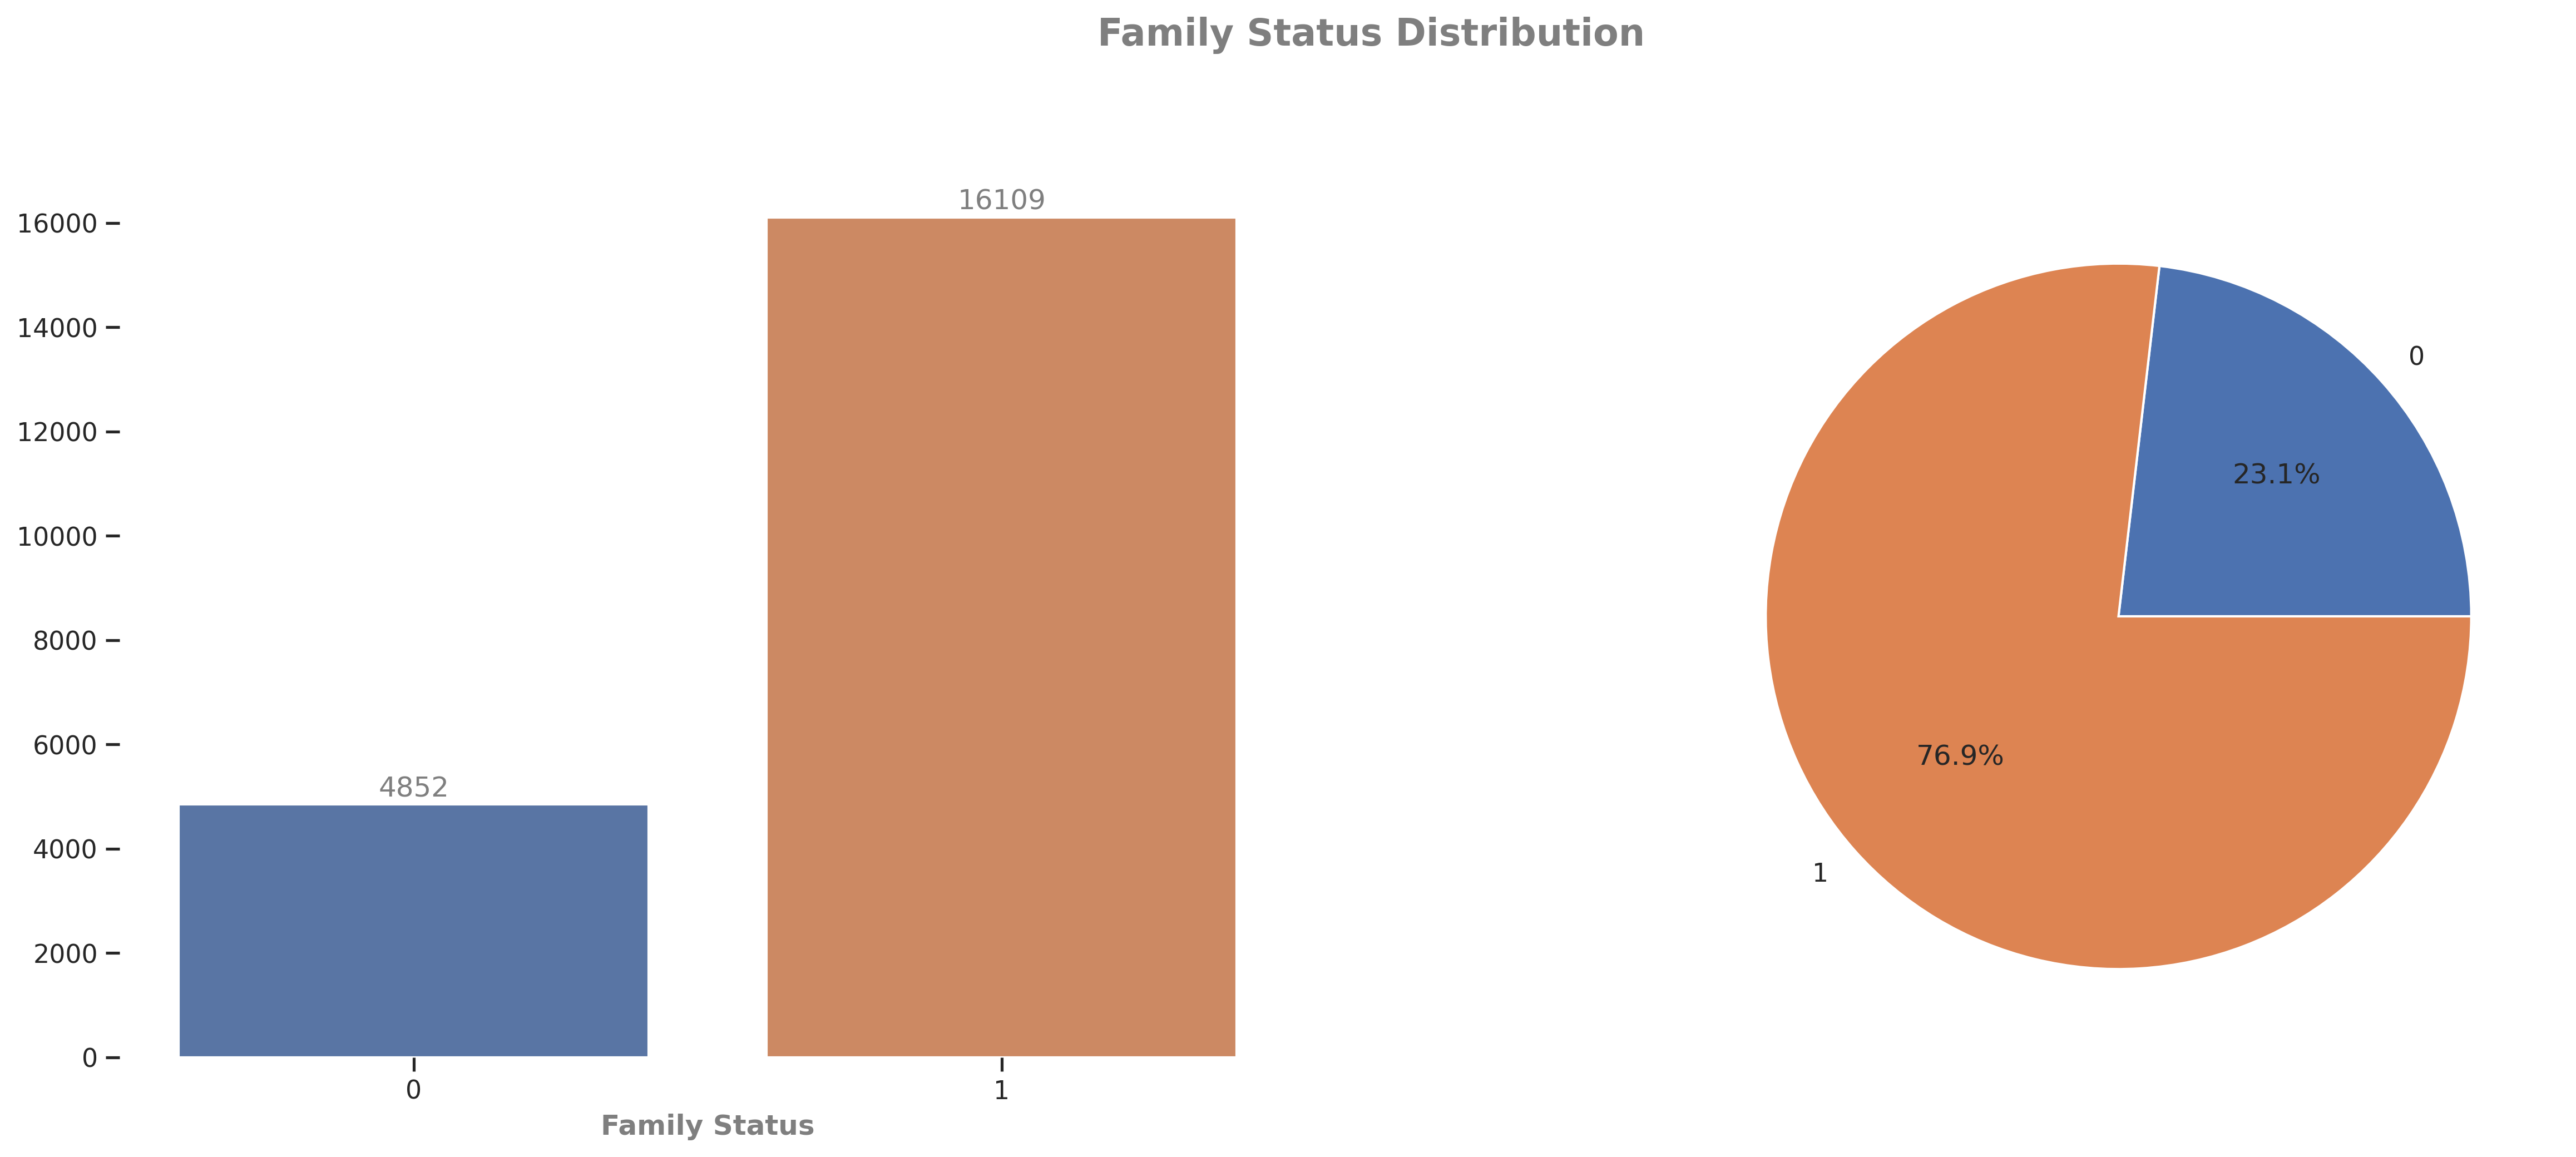

In [ ]:
t = df.merge(bool_table[['id', 'family_status_bool']], on='id')
univariate_multi_plot(df=t, x="family_status_bool", xlabel="Family Status")

- Женатые в 3 раза чаще берут кредит 76,9%

### 6.1.3 Purpose

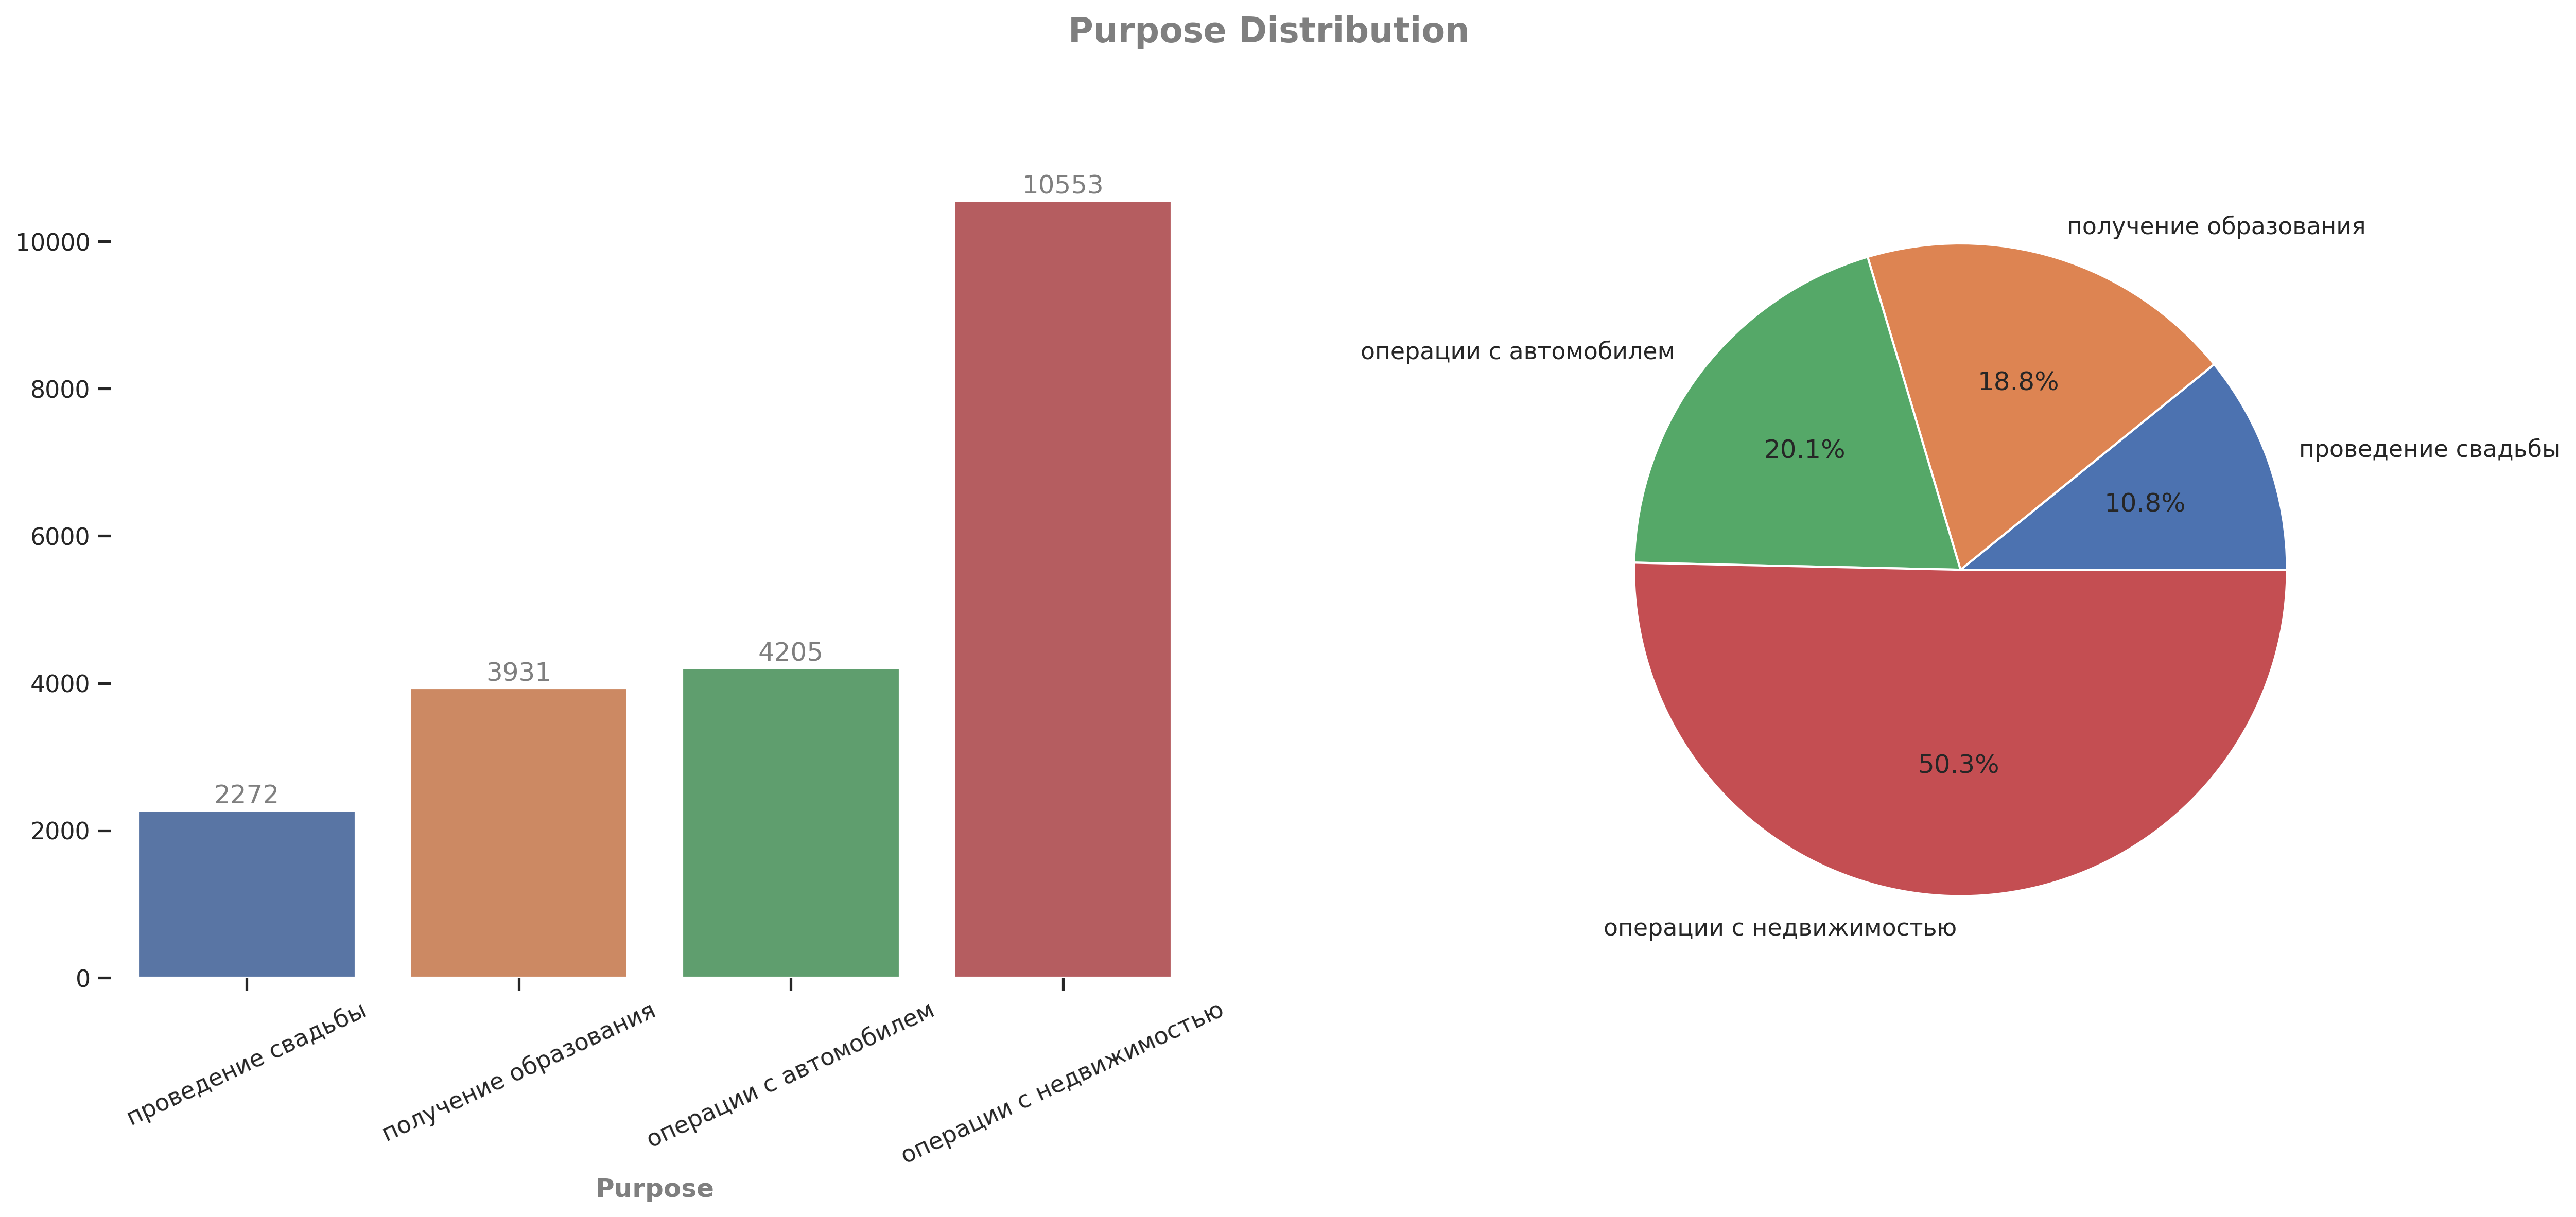

In [ ]:
t = df.merge(purpose_dict, on='purpose_id')
univariate_multi_plot(df=t, x="purpose", xlabel="Purpose", rotation=25)

- Самая популярная цель кредит на операции с недвижимостью 50%

### 6.1.4 Income Type 

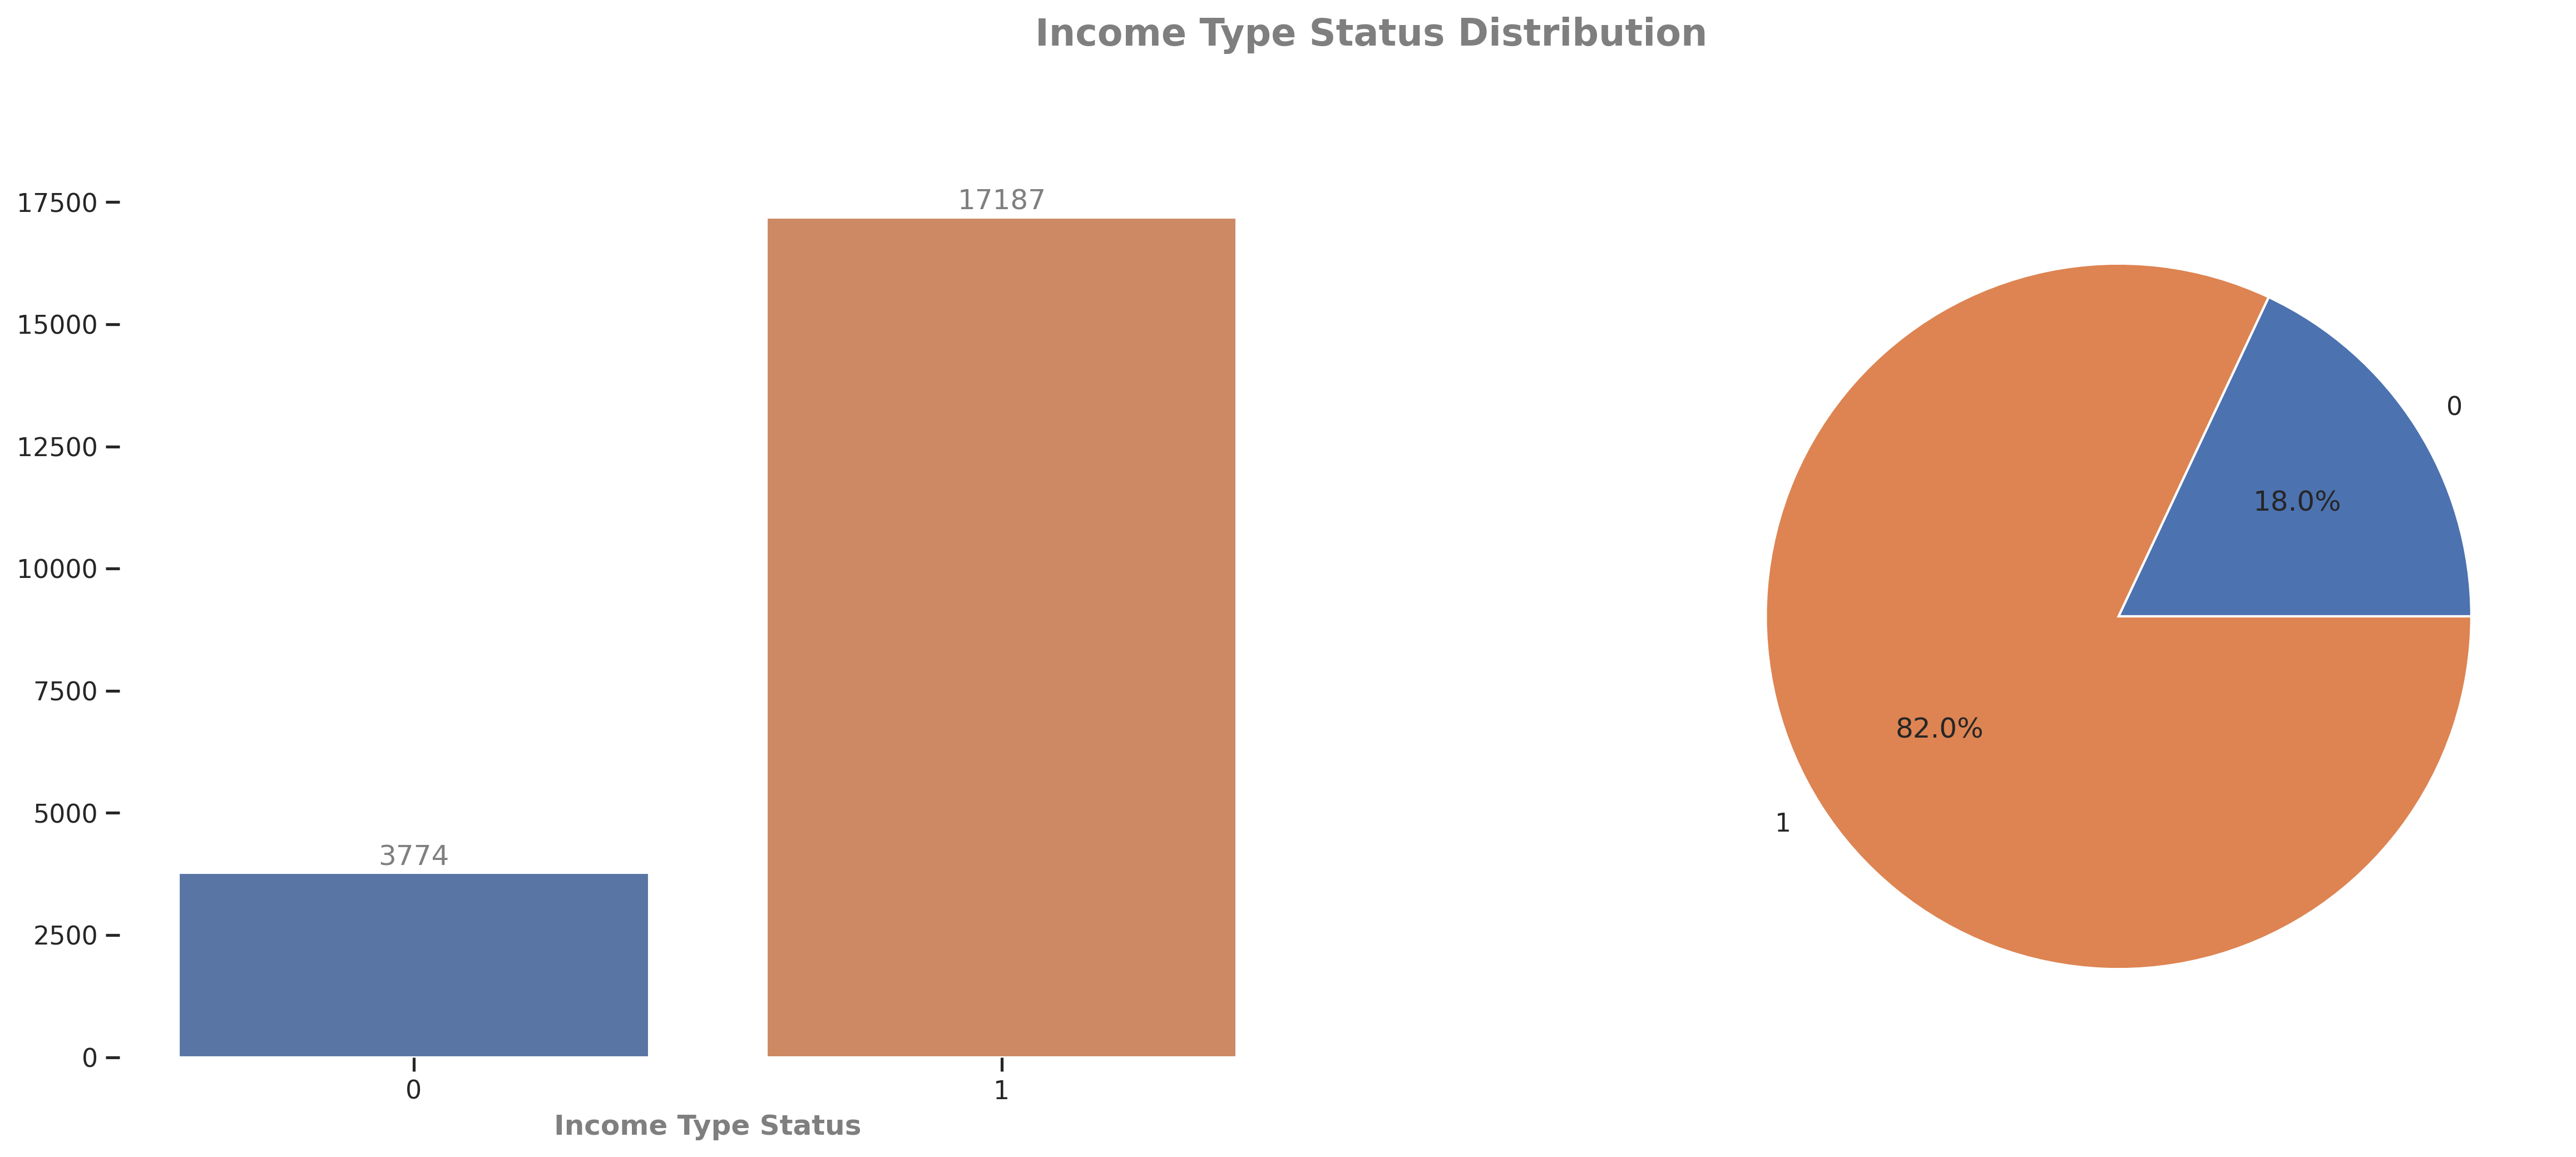

In [ ]:
t = df.merge(bool_table[['id', 'income_type_bool']], on='id')
univariate_multi_plot(df=t, x="income_type_bool", xlabel="Income Type Status")

- Пенсионеры берут кредиты в 18% случаев
- Все остальные рабочие люди.

### 6.1.5 Gender

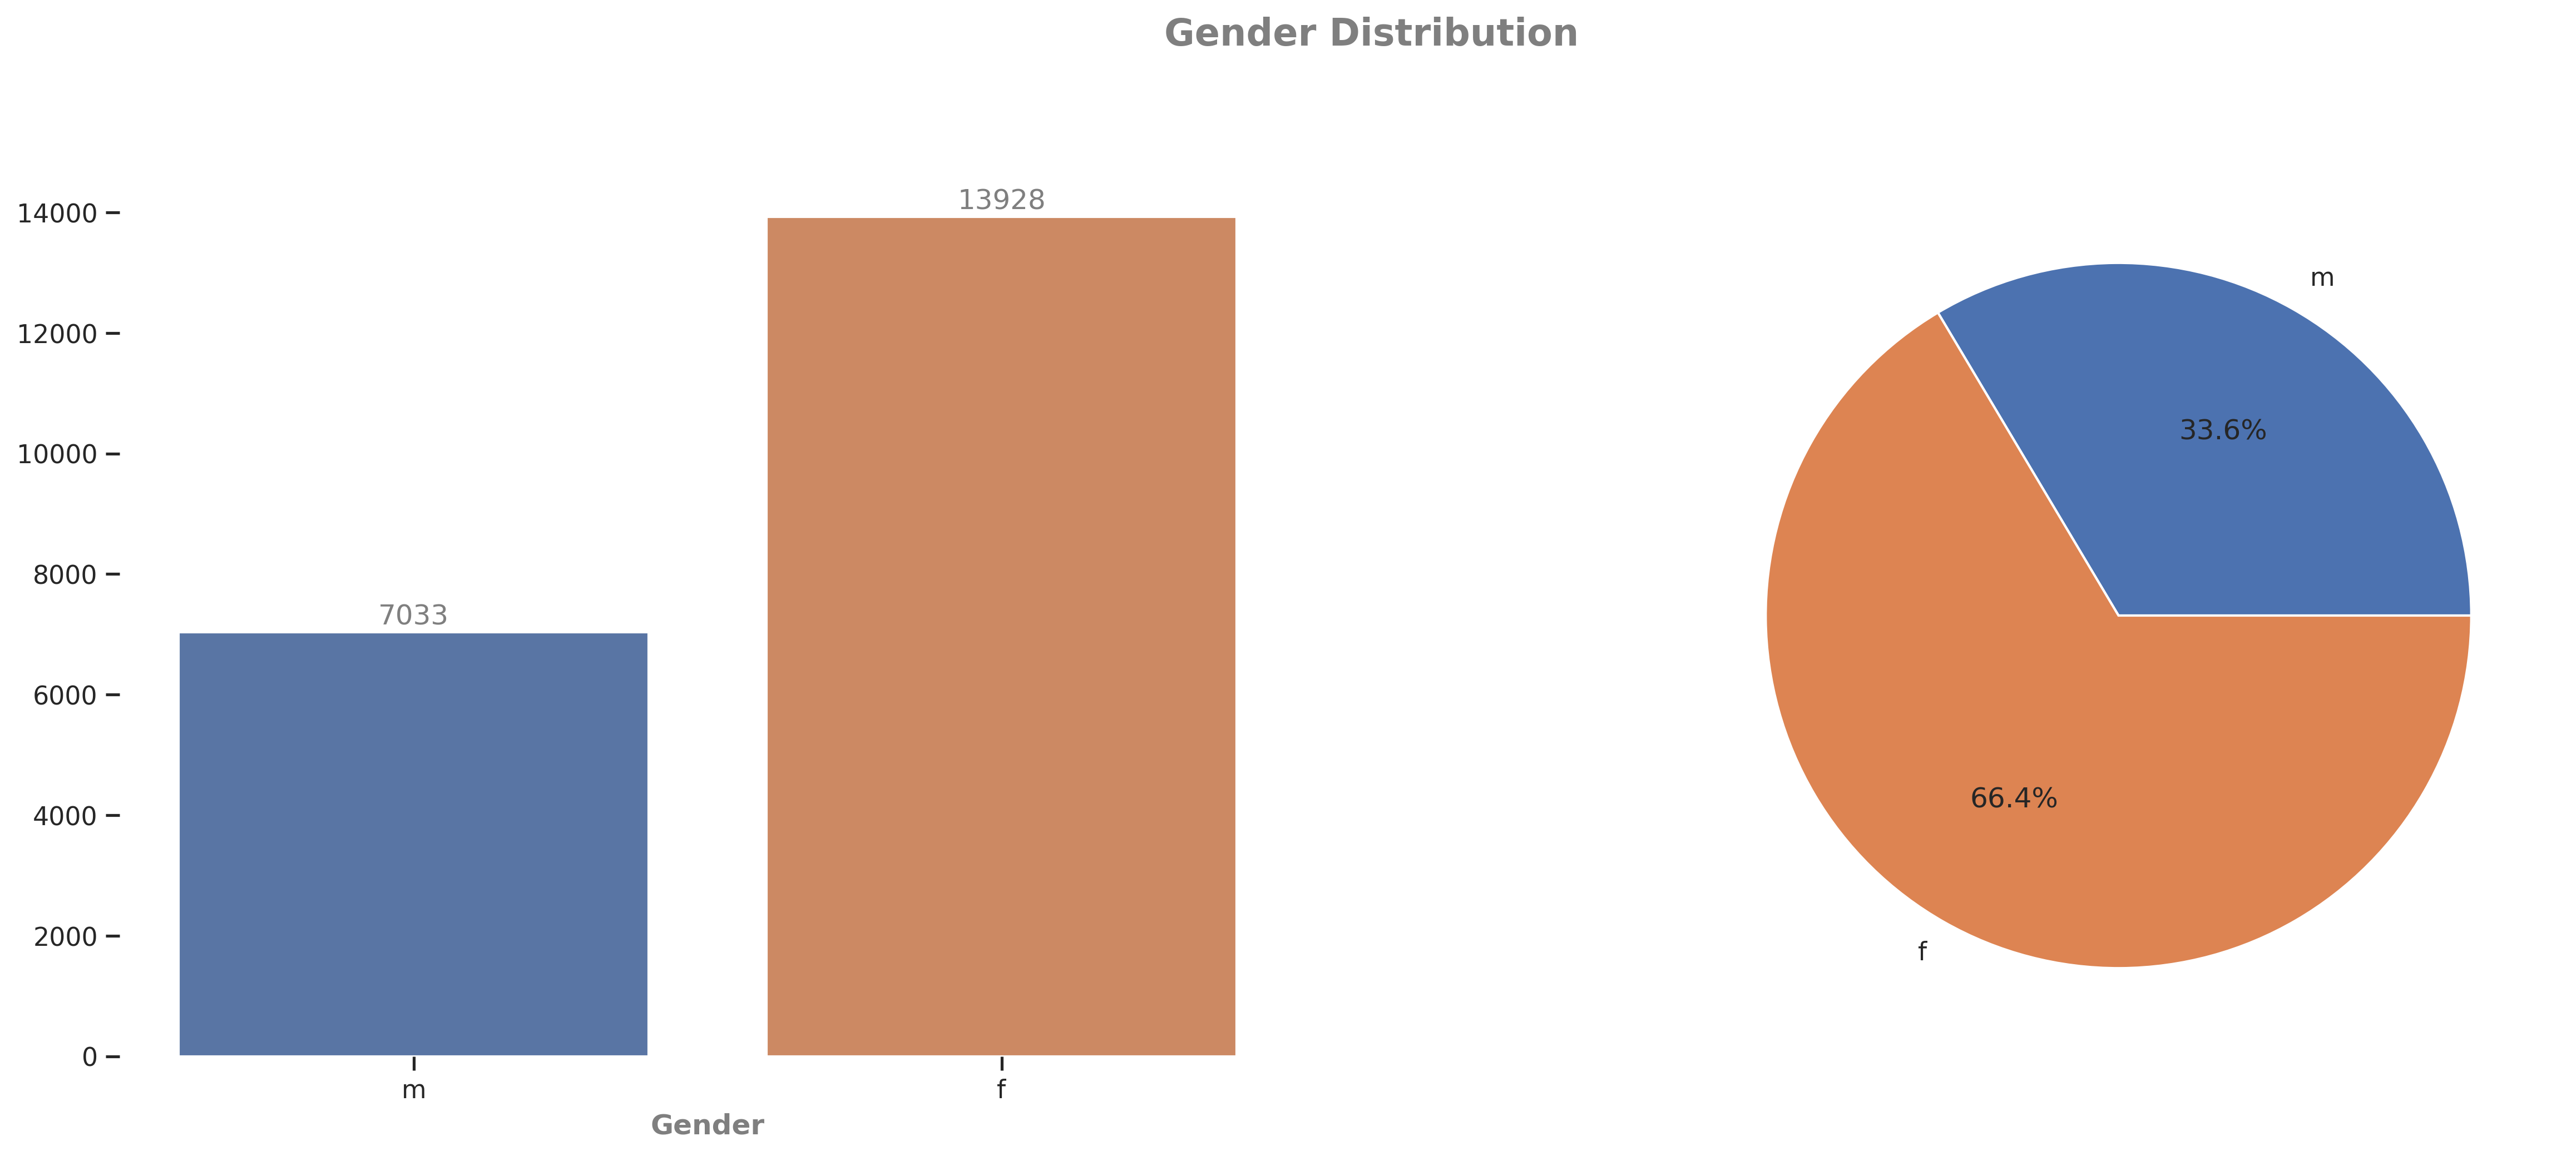

In [ ]:
t = df.merge(gender_dict, on='gender_id')
univariate_multi_plot(df=t, x="gender", xlabel="Gender")

 - Женщины в два раза чаще берут кредиты 66.4%

### 6.1.6 Total Income Category

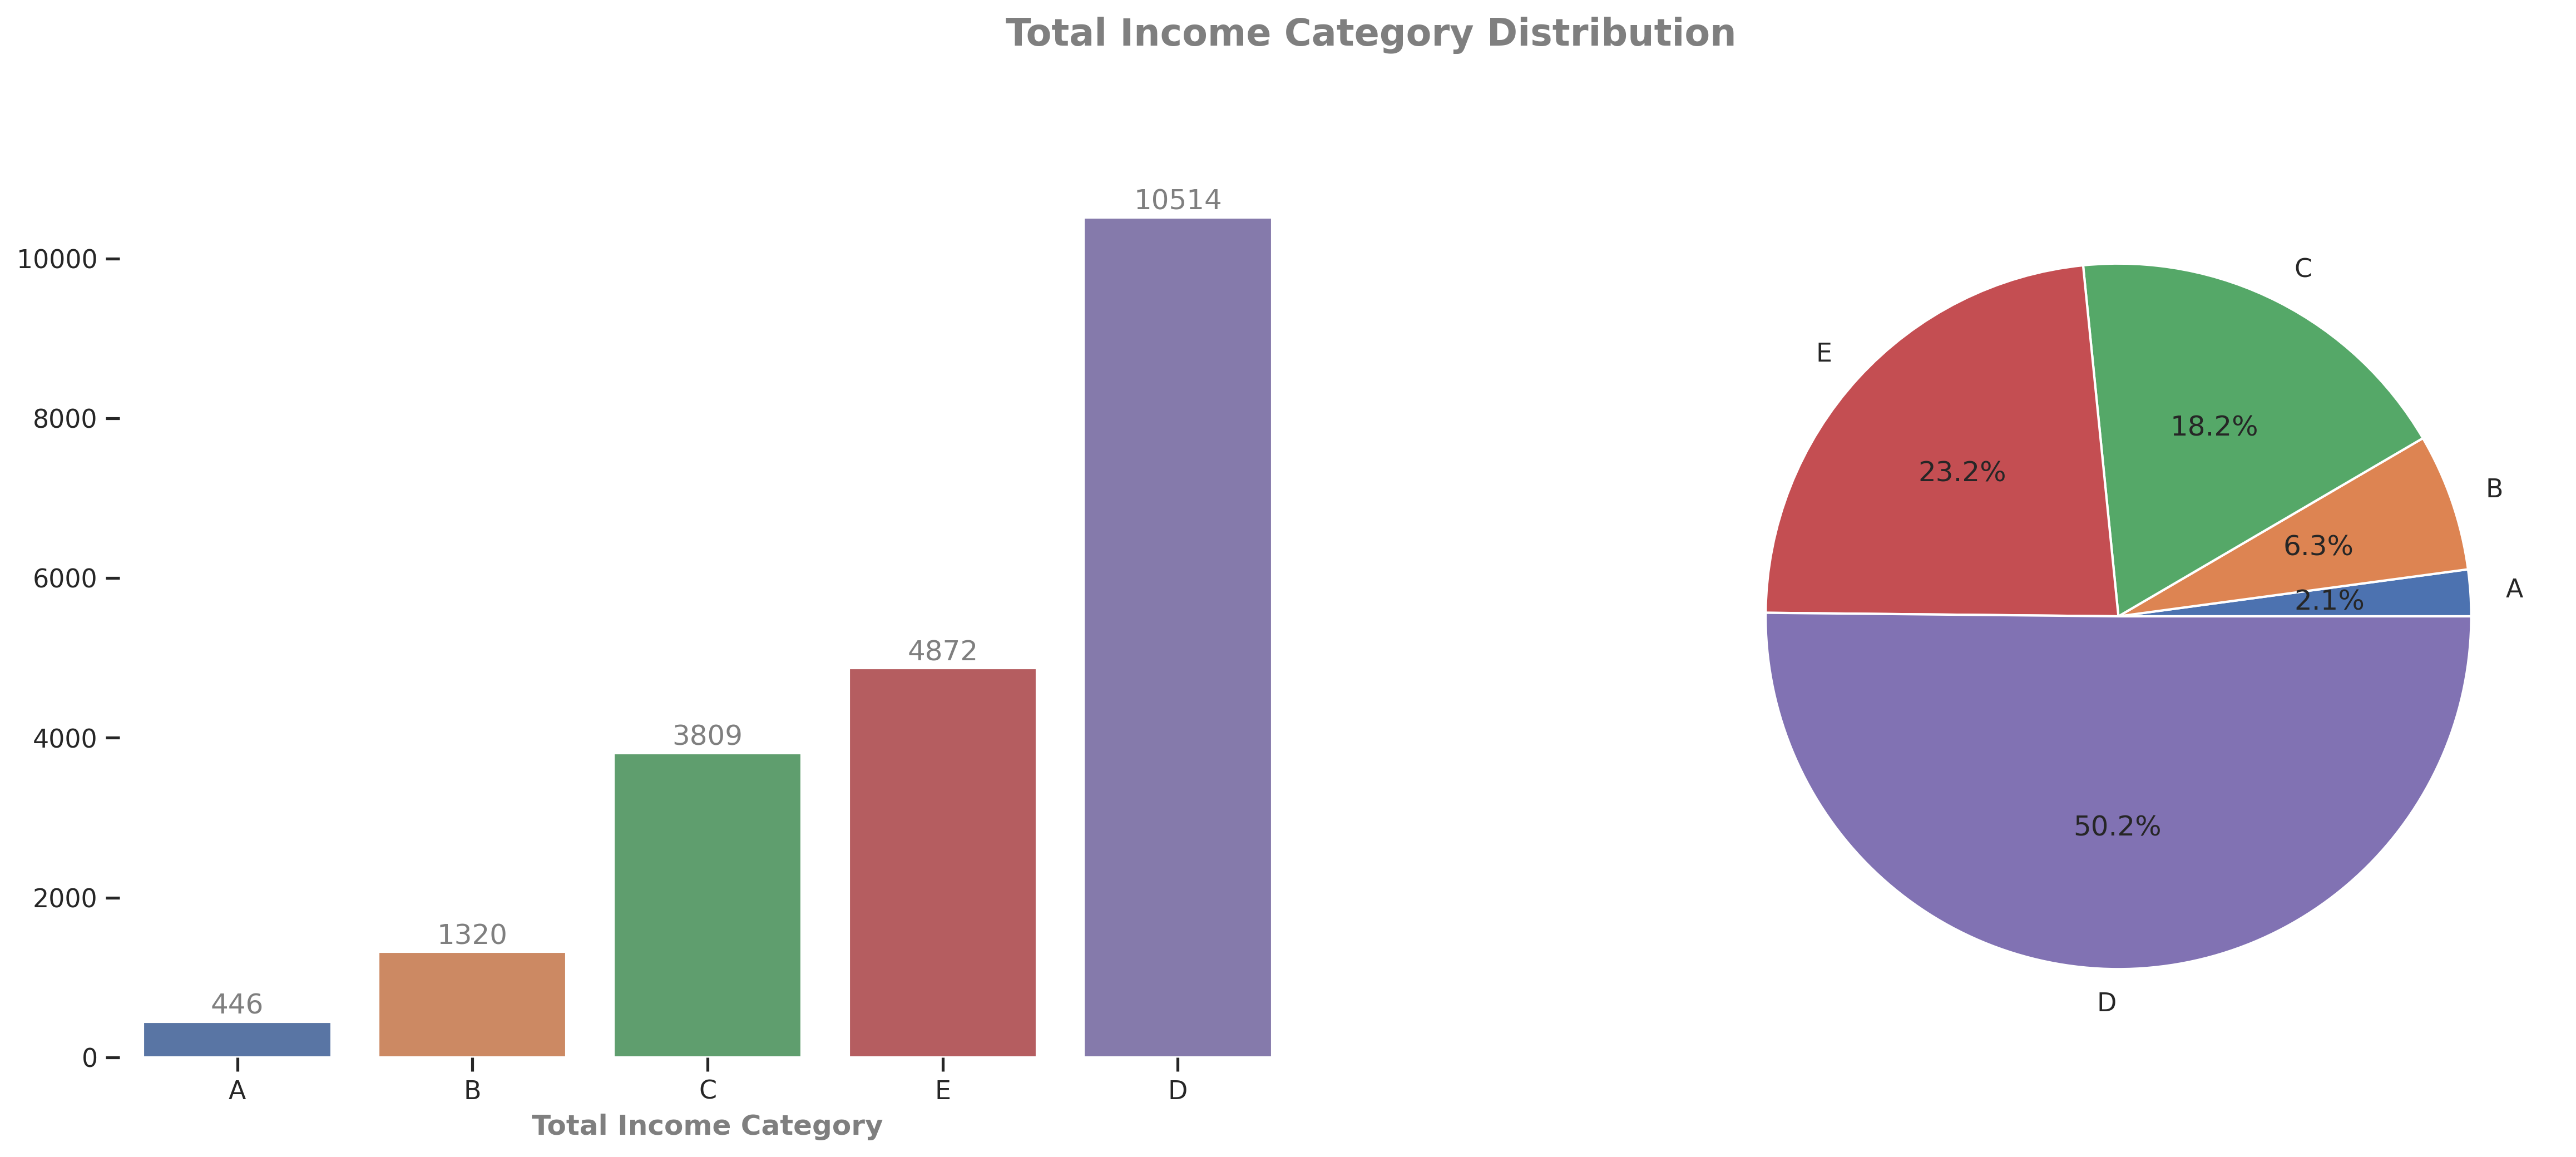

In [ ]:
t = df.merge(total_income_category_dict, on='total_income_category_id')
univariate_multi_plot(df=t, x="total_income_category", xlabel="Total Income Category")

In [ ]:
print(t.query('total_income_category == "D"')['total_income'].min())
print(t.query('total_income_category == "D"')['total_income'].max())

103545
186413


- Половаина кредитов взяли клиенты с доходом категории D - 50%, доход в диапазоне 103,545 - 186,413

### 6.1.7 Dob Years

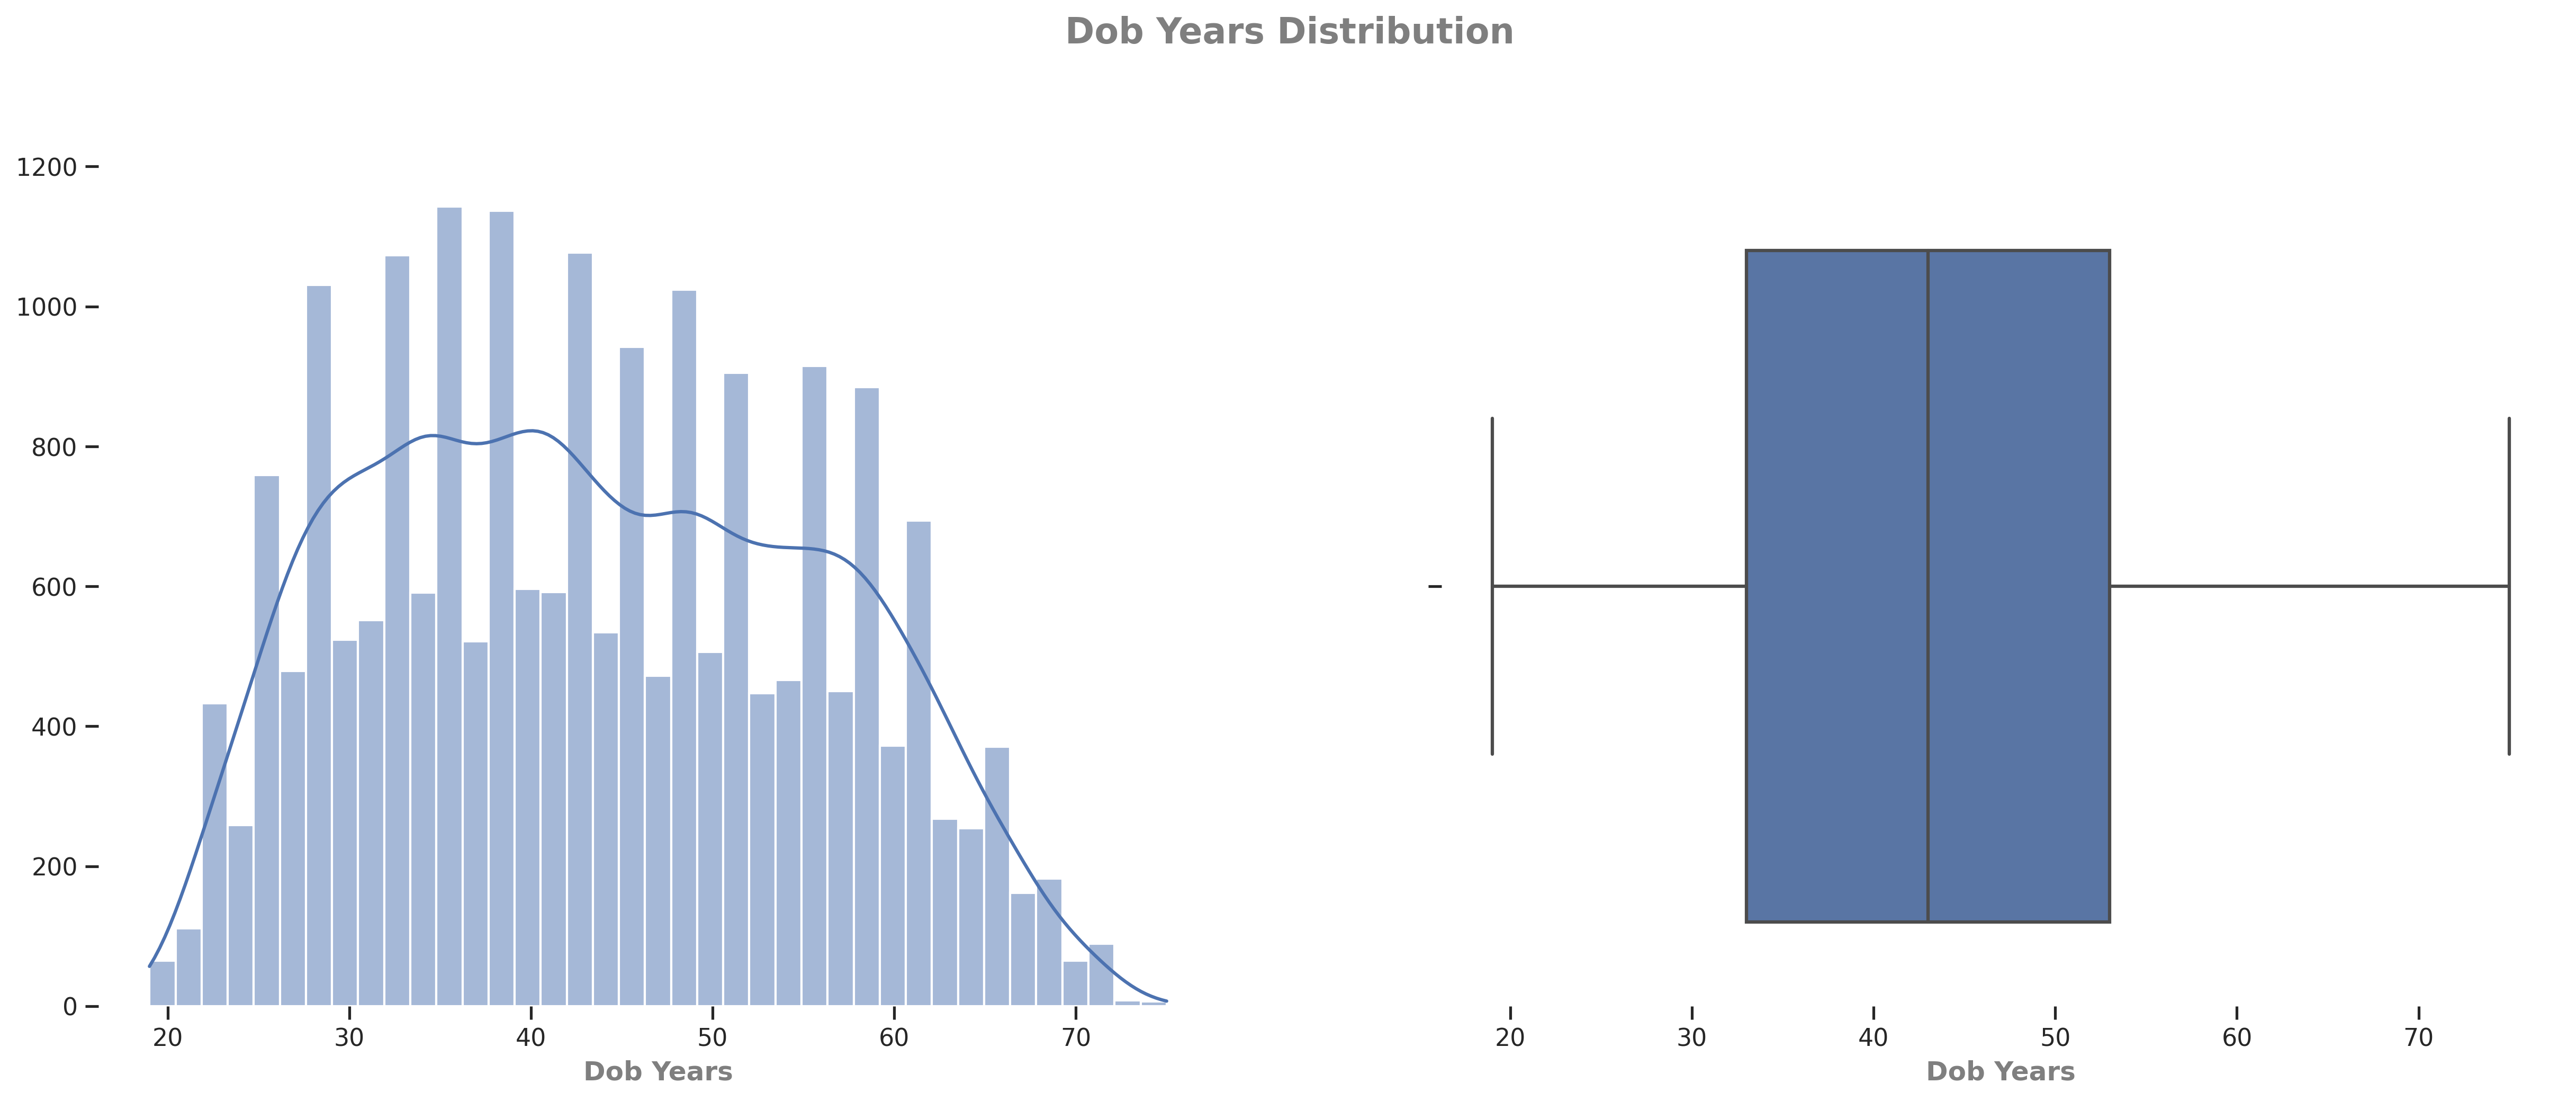

In [ ]:
univariate_numerical_plot(df=df, x='dob_years', xlabel='Dob Years')

- Средний возраст заемщика 43 лет, большинство значений назодится в диапазоне 33 - 54 лет. 

### 6.1.8 Total Income

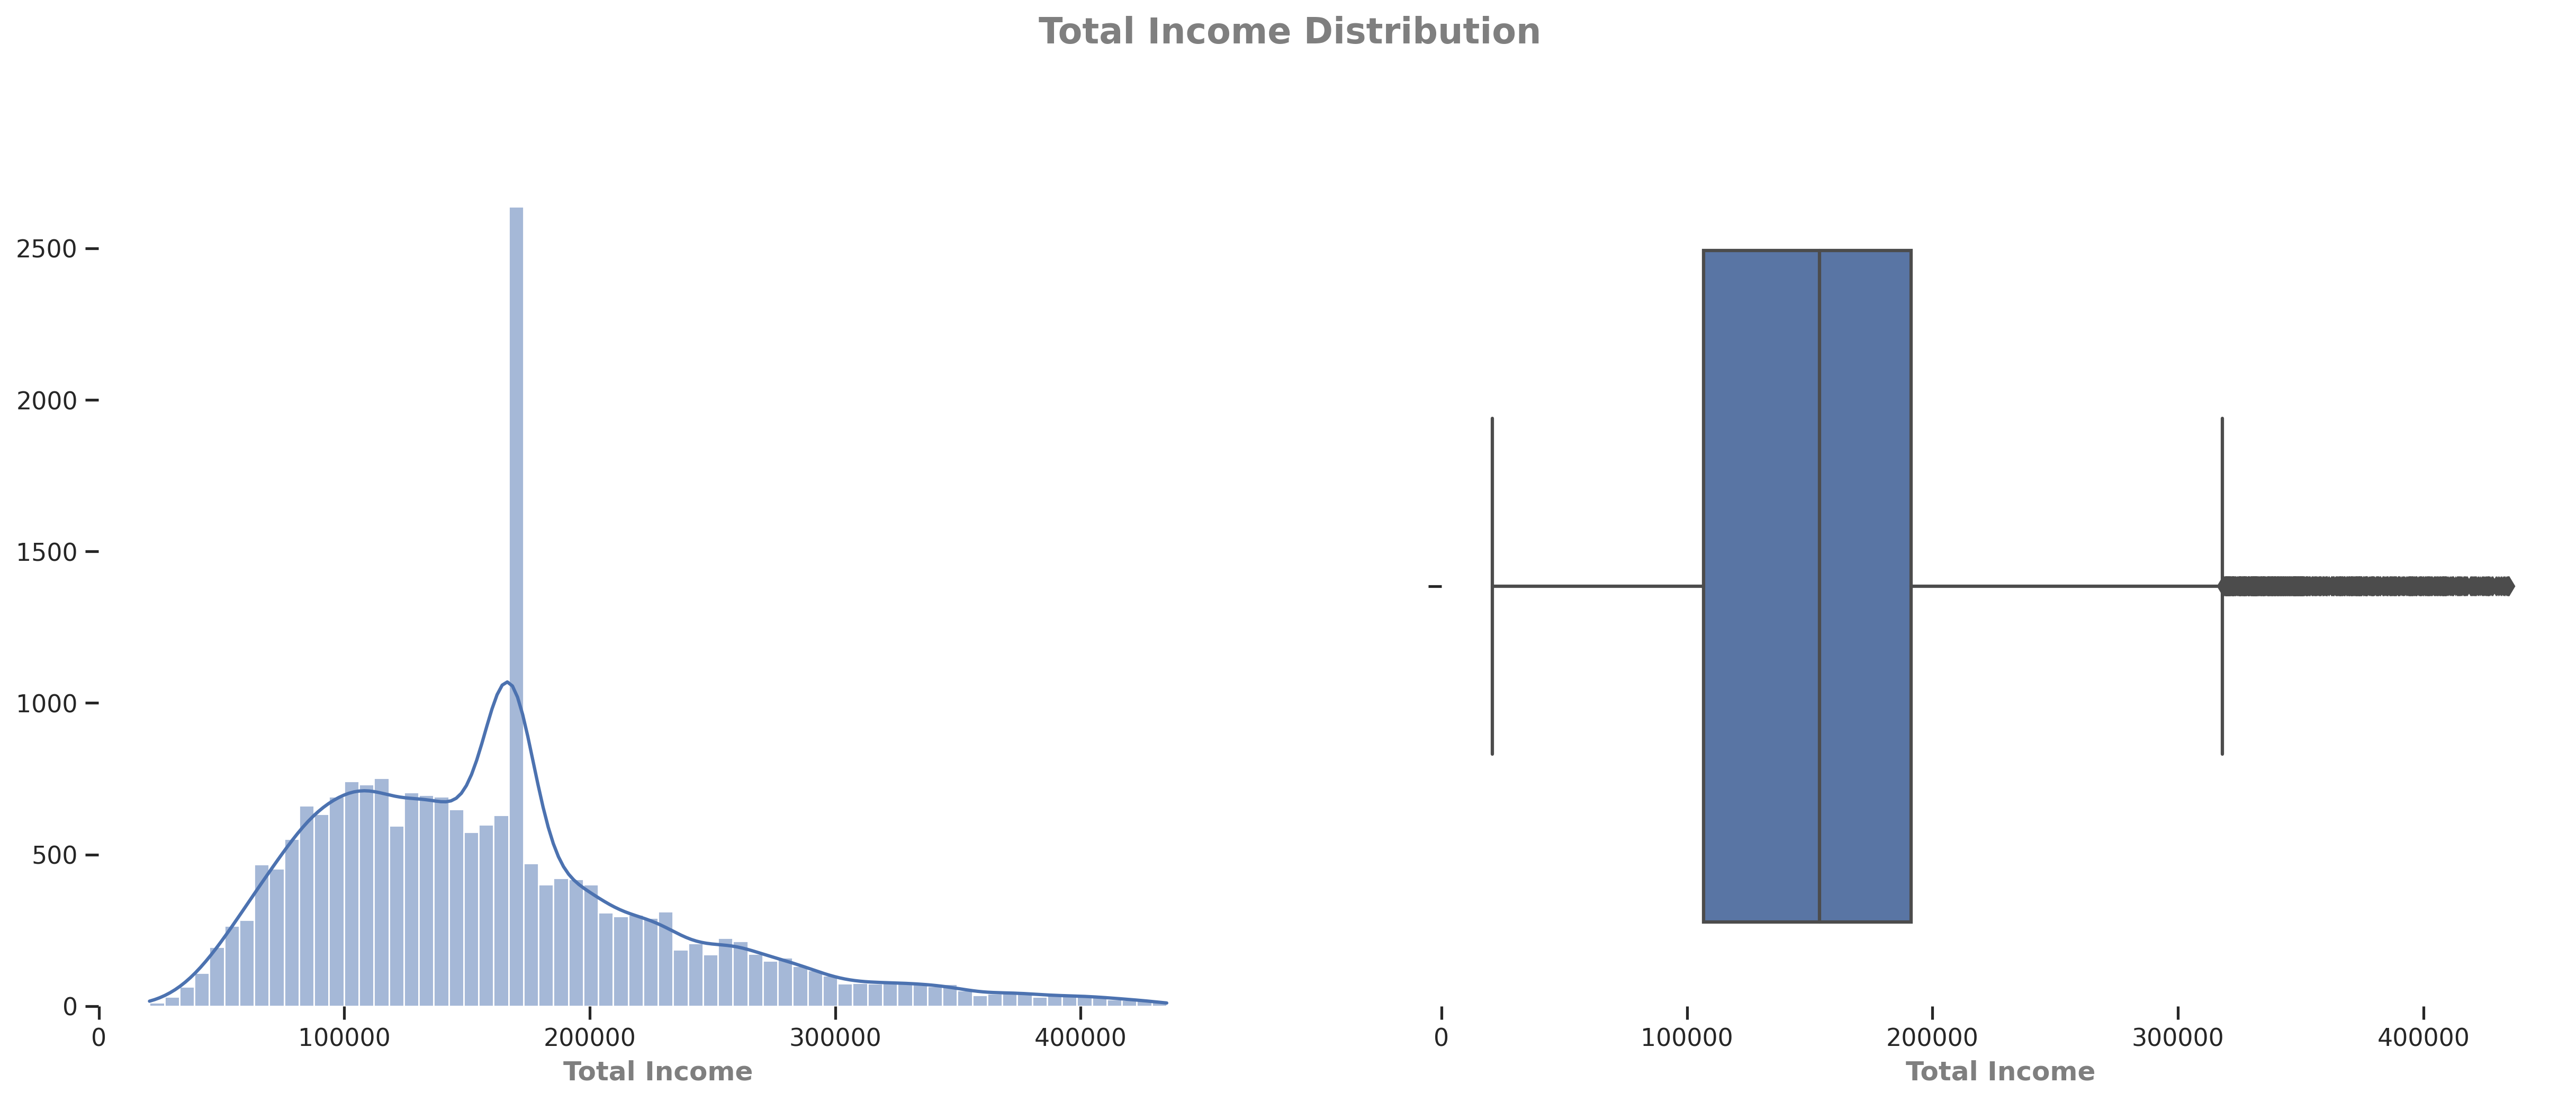

In [ ]:
univariate_numerical_plot(df=df, x='total_income', xlabel='Total Income')

- Средний уровень доходов кредитора 175,000 

## 6.2 Двумерный анализ

- Посмотрим у каких категорий, какая задолженность (dept): education / family_status / purpose / income_type	/ gender / total_income_category

In [ ]:
# Функции графиков

def multivariate_plot(df=df, x=None, y=None, hue=None, xlabel=None, ylable=None,
                      heading=None, rotation=None, bar_label=True, 
                      legend=False, rotate_label=False):
    fig, ax = plt.subplots(1, 1, figsize=(20, 7))
    df = round((df.groupby(x)[y].mean().sort_values().reset_index().copy()),2)

    sns.barplot(data=df, x=x, y=y, hue=hue, ci=None)

    plt.ylabel(ylabel=ylable, size=12, fontdict=FIG_FONT)
    plt.xlabel(xlabel=xlabel, size=12, fontdict=FIG_FONT)
    plt.title(label=f'{heading} {xlabel}', size=16, fontdict=FIG_FONT)
    plt.xticks(rotation=rotation)
    if legend:
        plt.legend()
    if bar_label and rotate_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=10, padding=3, fontname="Helvetica, Ariel", 
                    color="#7f7f7f", rotation="vertical")
    elif bar_label and not rotate_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=12, padding=1, fontname="Helvetica, Ariel", 
                    color="#7f7f7f")
    sns.despine(bottom=True, left=True)
    plt.show()


In [ ]:
df_category = (
    df.merge(education_dict, on='education_id')
    .merge(family_dict, on='family_status_id')
    .merge(purpose_dict, on='purpose_id')
    .merge(income_type_dict, on='income_type_id')
    .merge(gender_dict, on='gender_id')
    .merge(total_income_category_dict, on='total_income_category_id')
    .merge(bool_table[['id', 'children_bool']], on='id')
    .merge(bool_table[['id', 'education_bool']], on='id')
    [['education',	'family_status',	
      'purpose',	'income_type',	
      'gender',	'total_income_category', 'debt', 
      'children_bool', 'education_bool']]
 )

### 6.2.1 Education And Debt

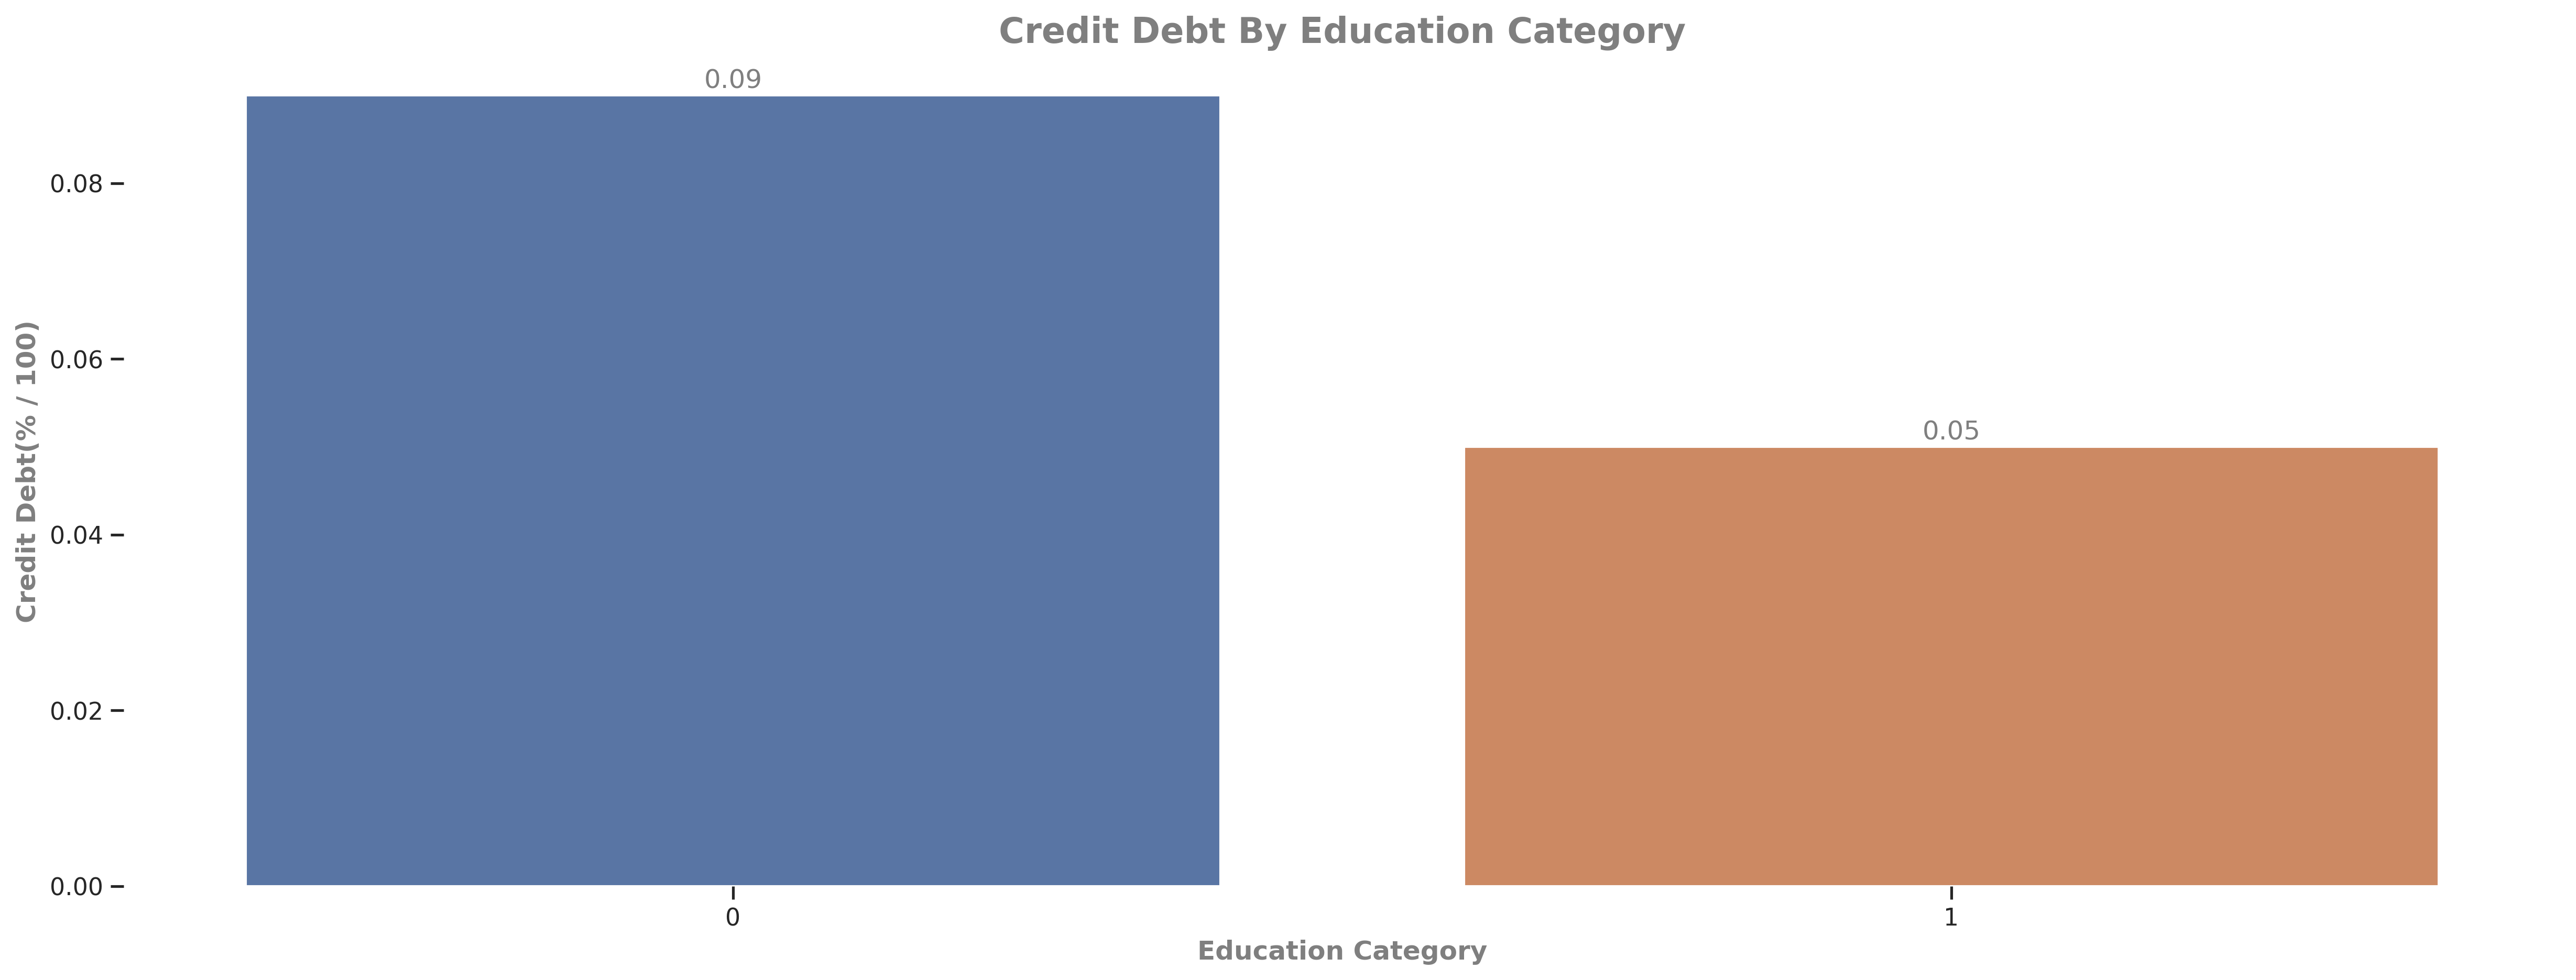

In [ ]:
multivariate_plot(
    df=df_category, x="education_bool", y="debt", 
    xlabel="Education Category", ylable="Сredit Debt(% / 100)", 
    heading="Сredit Debt By", bar_label=True
    )

- Те у кого есть высшее 5% задоженности
- У кого нет высшего 9%

### 6.2.2 Family Status And Debt

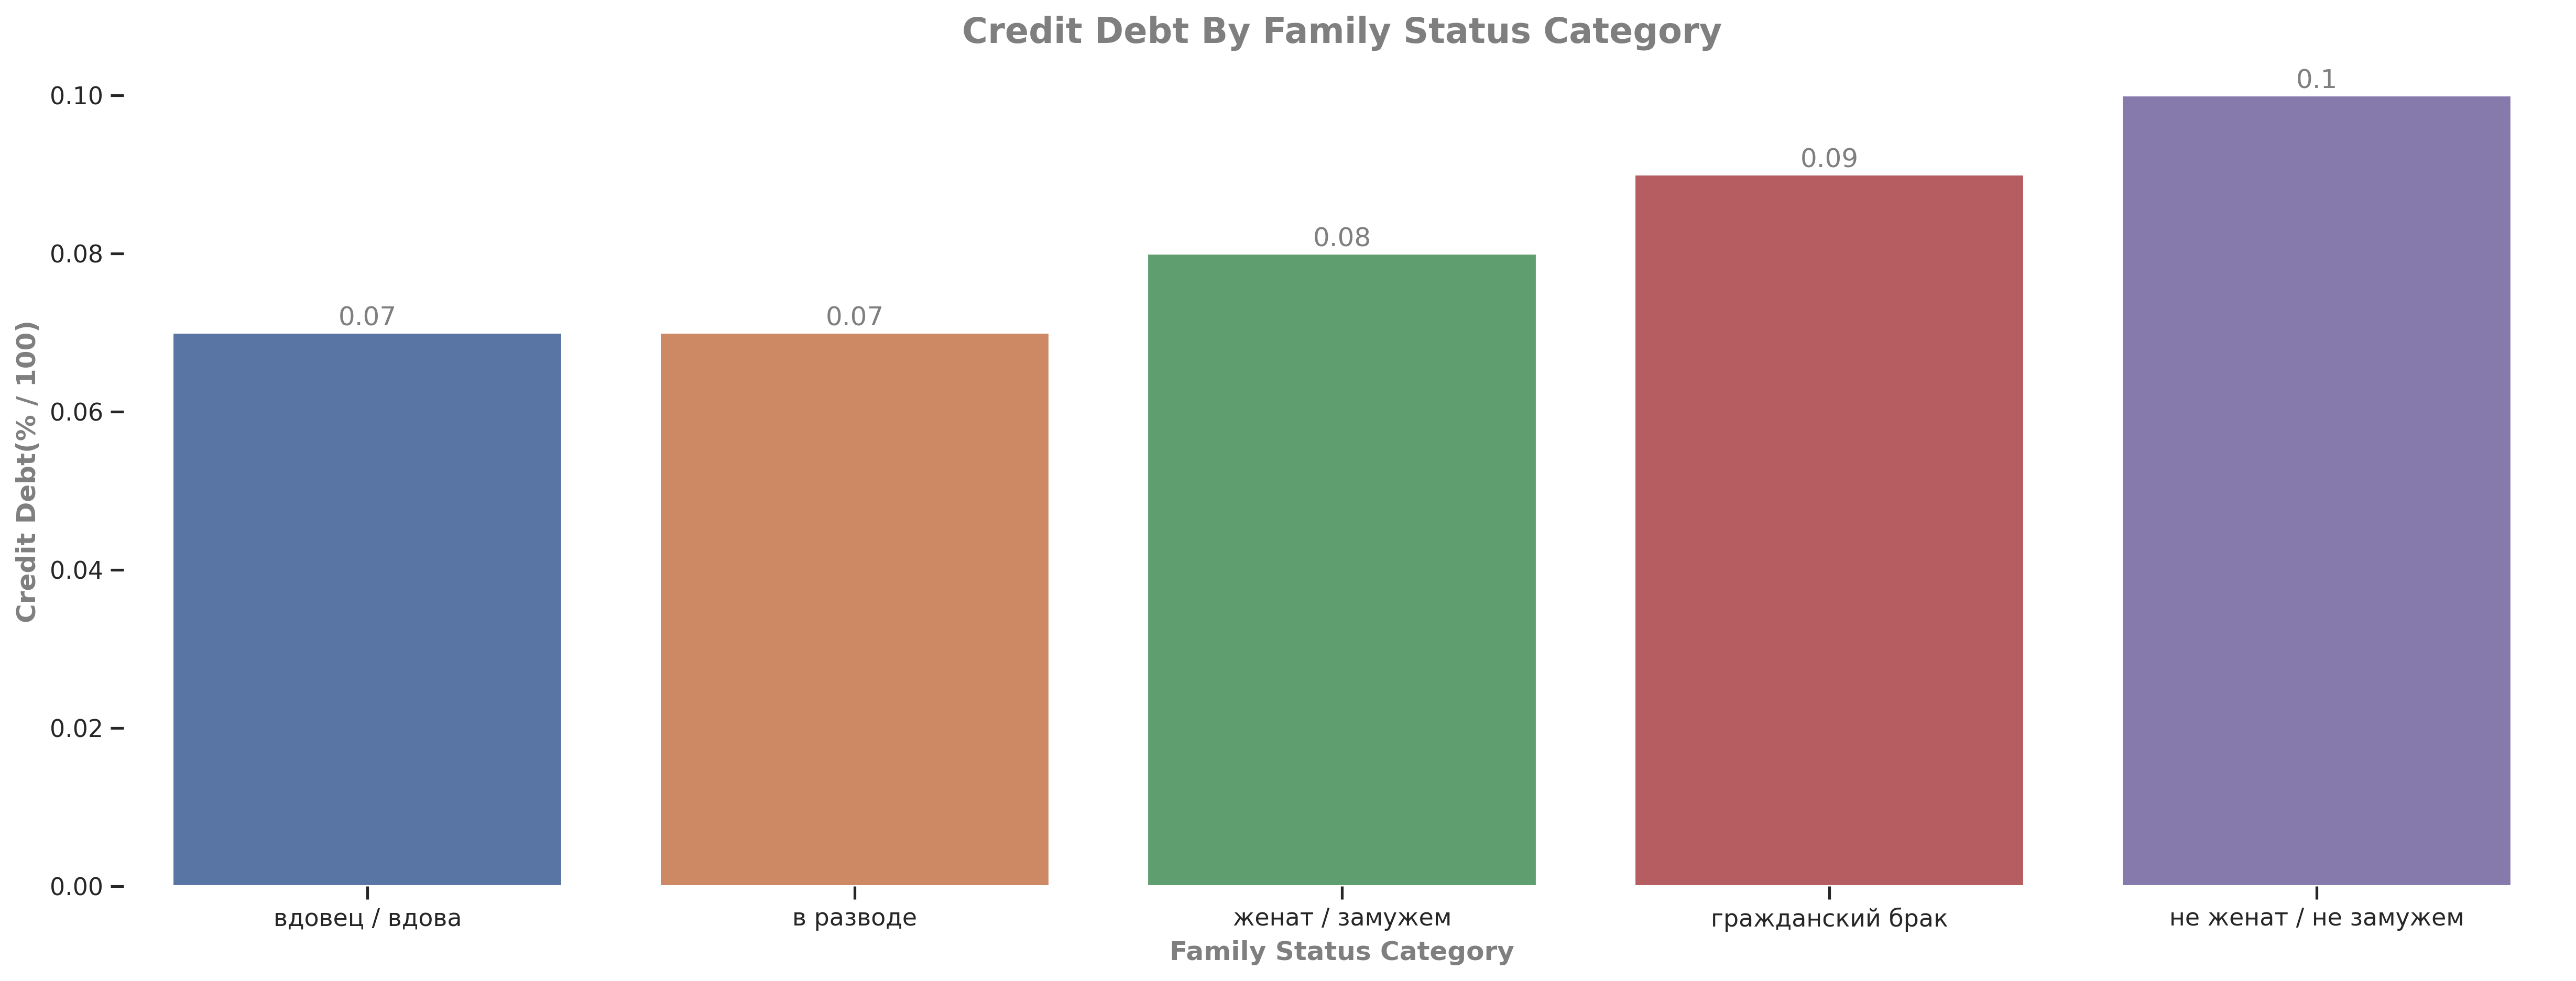

In [ ]:
multivariate_plot(
    df=df_category, x="family_status", y="debt", 
    xlabel="Family Status Category", ylable="Сredit Debt(% / 100)", 
    heading="Сredit Debt By", bar_label=True
    )

- Хуже всего возвращают кредит **не женат/ не замужем 10%**
- Лучше всех **вдовец/вдова** и **в разводе по 7%**

### 6.2.3 Purpose And Debt

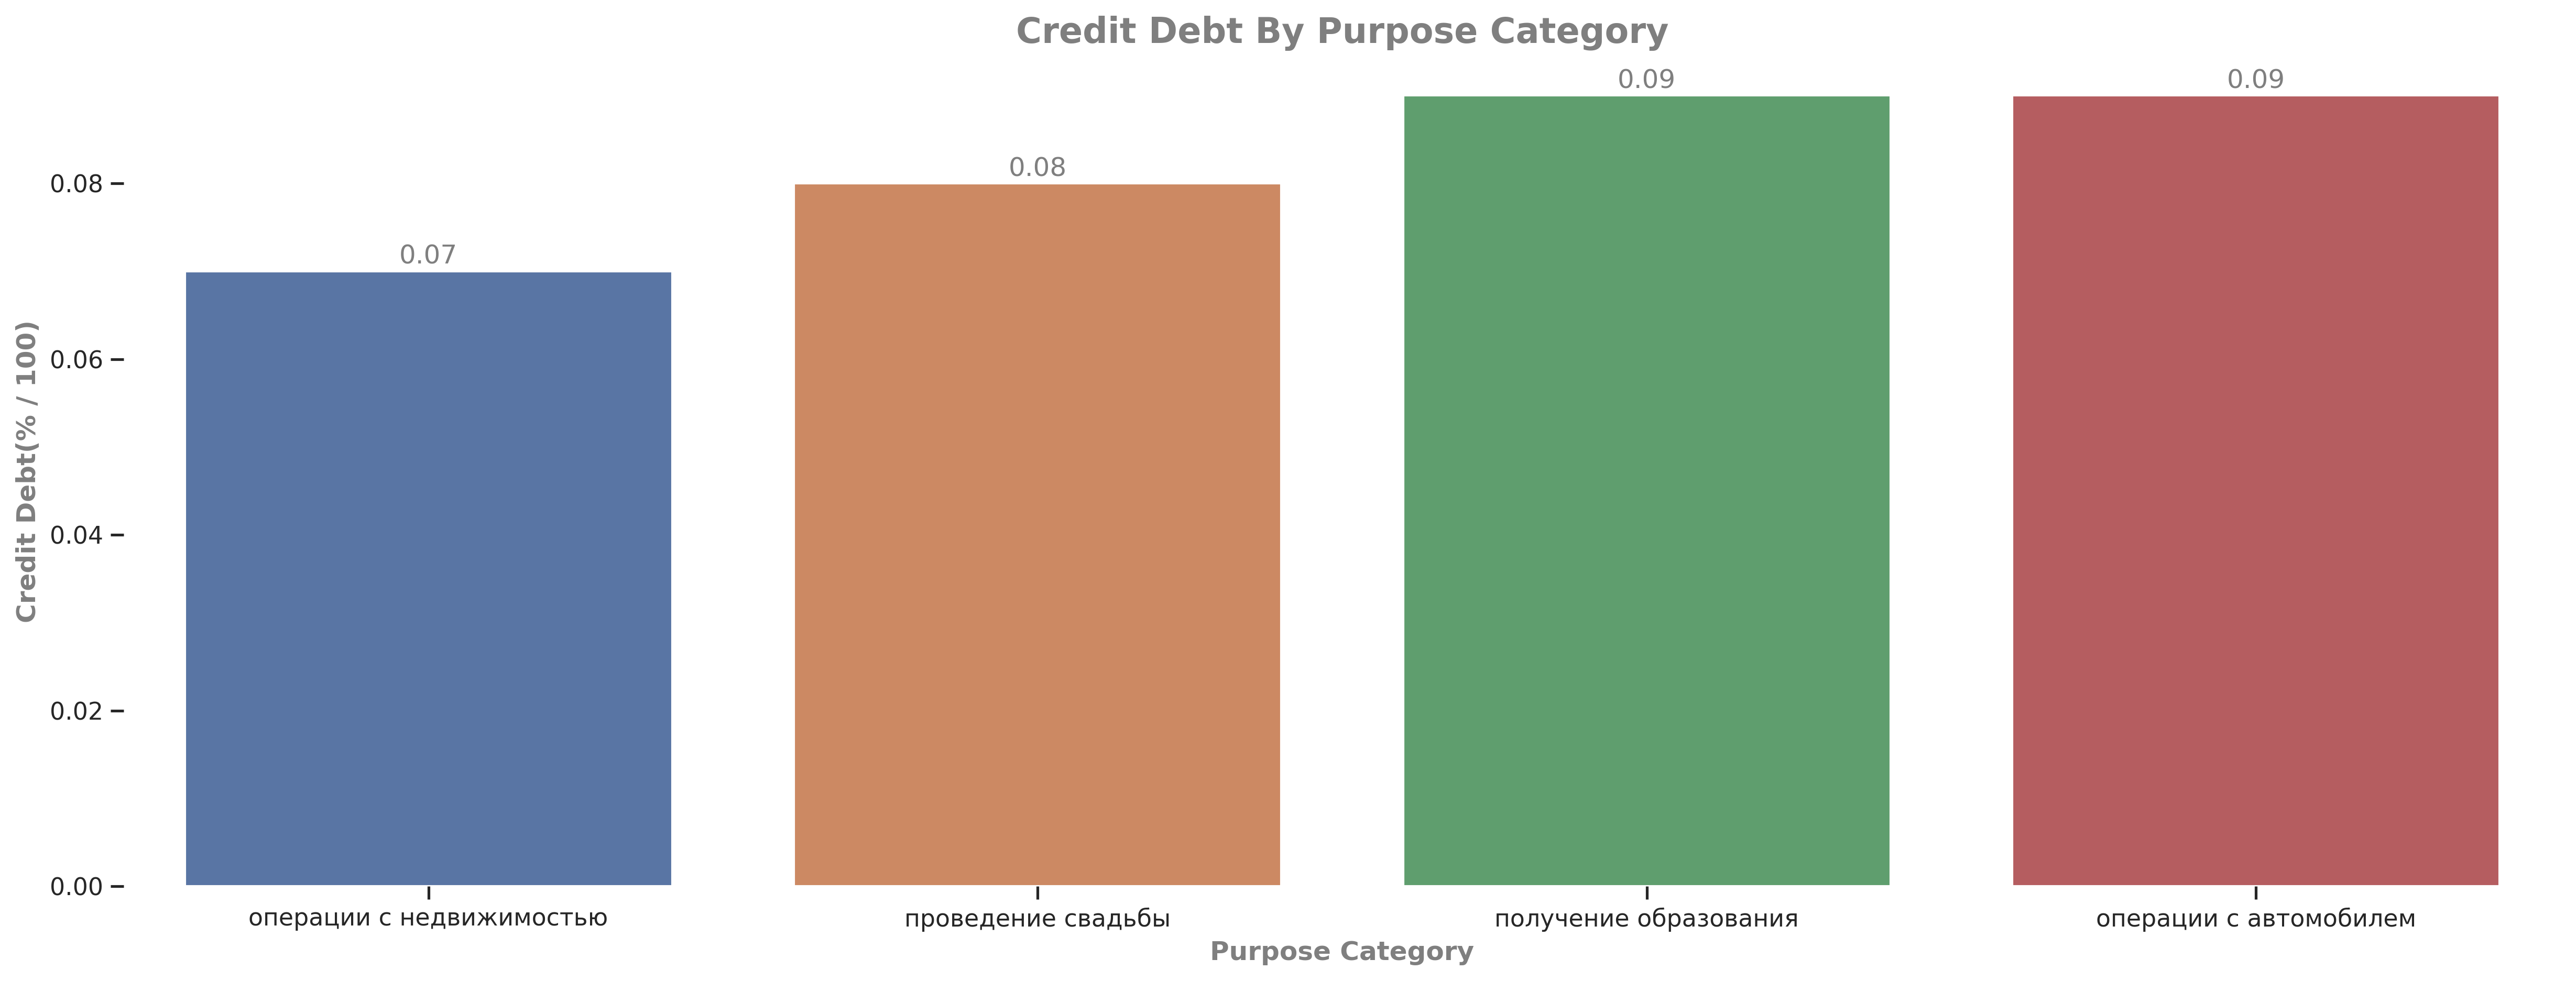

In [ ]:
multivariate_plot(
    df=df_category, x="purpose", y="debt", 
    xlabel="Purpose Category", ylable="Сredit Debt(% / 100)", 
    heading="Сredit Debt By", bar_label=True
    )

- Хуже других категории **получения образования** и **операции с авто** по **9%**
- Лучше других операции с **недвижимостью 7%**

### 6.2.4 Income Type Category And Debt

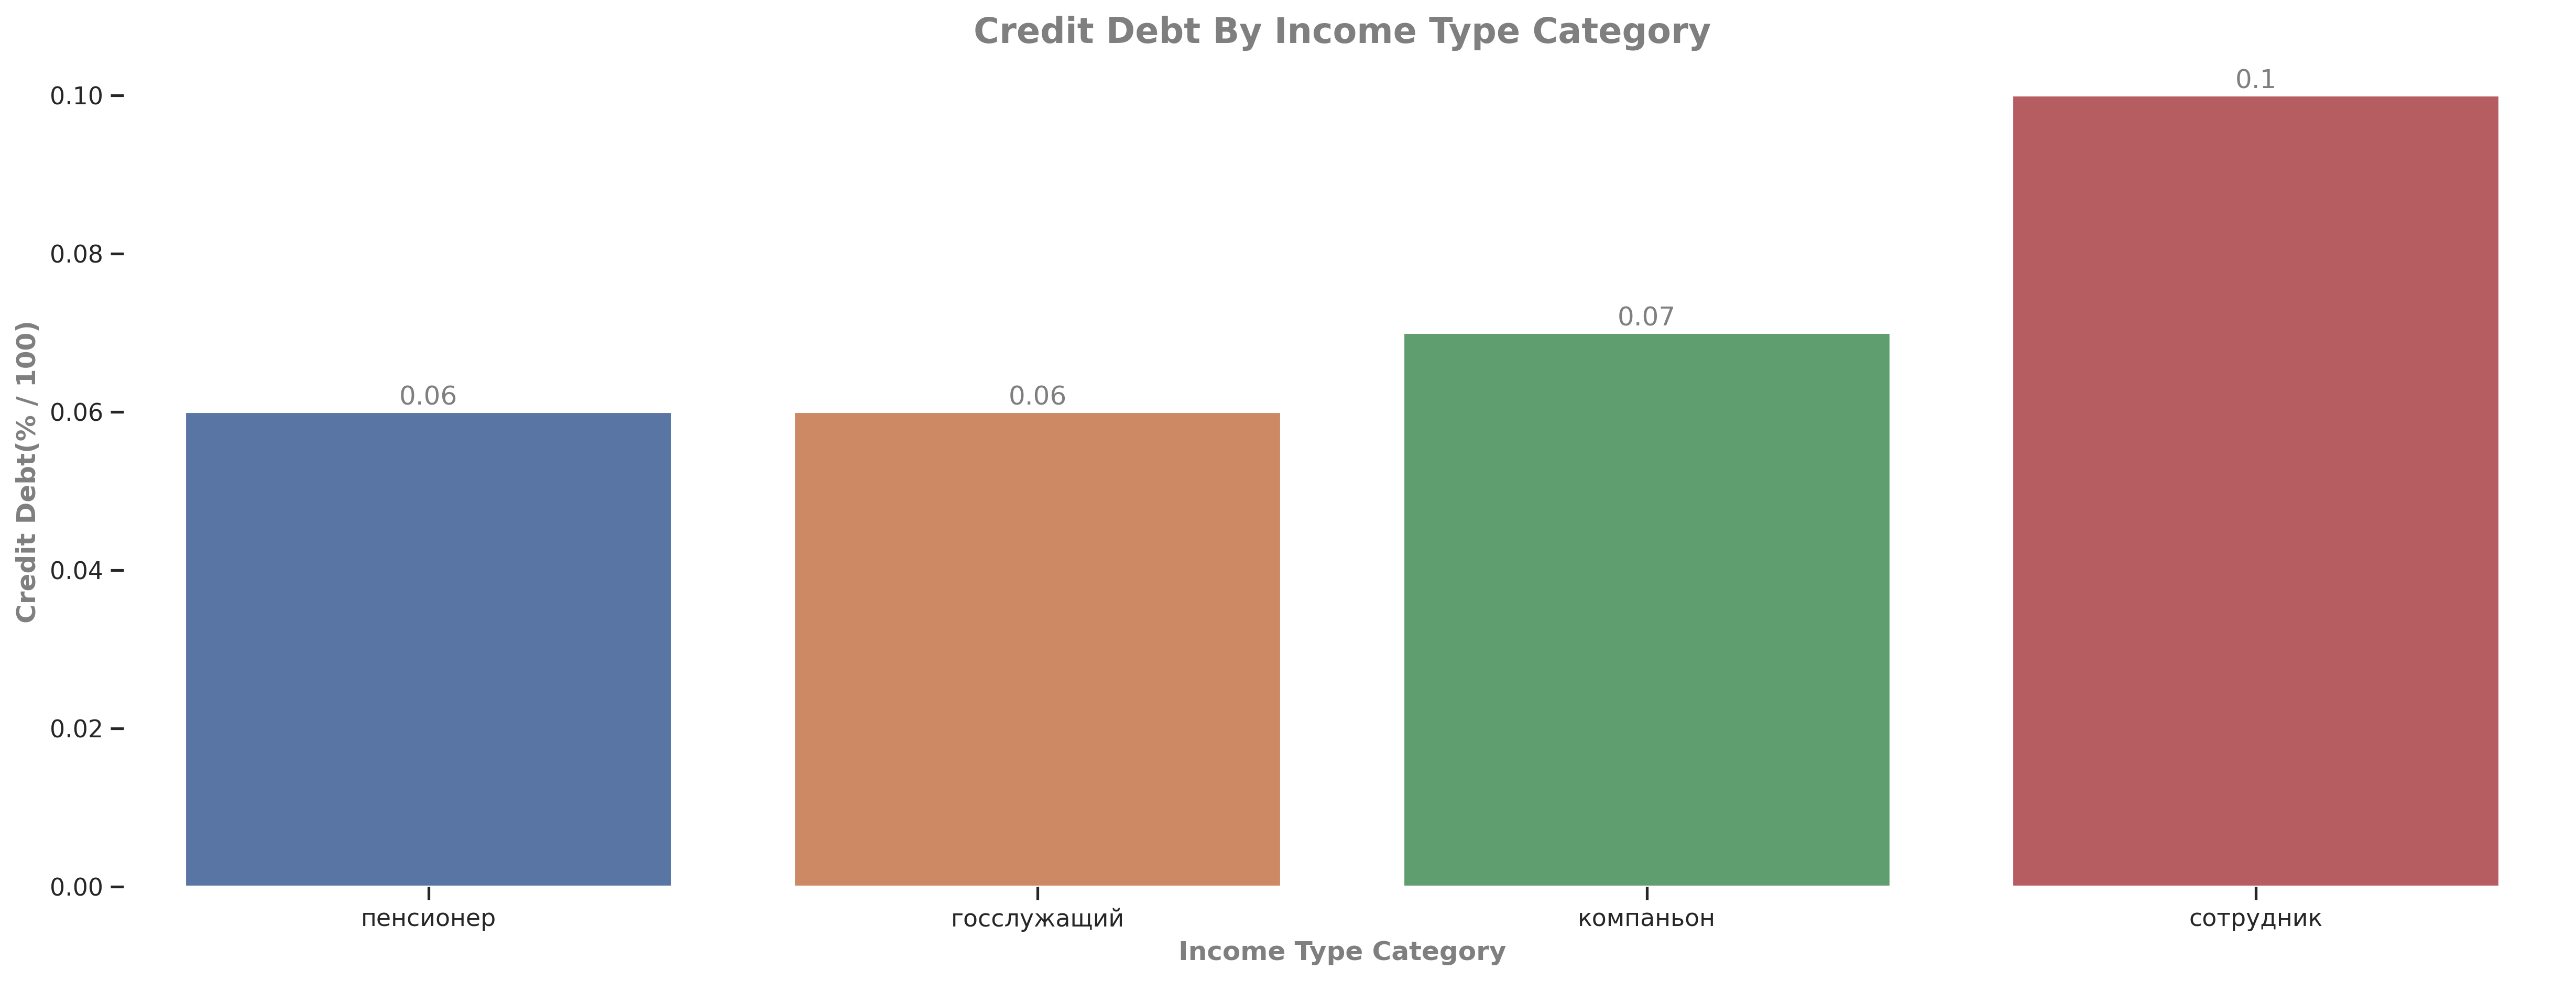

In [ ]:
multivariate_plot(
    df=df_category, x="income_type", y="debt", 
    xlabel="Income Type Category", ylable="Сredit Debt(% / 100)", 
    heading="Сredit Debt By", bar_label=True
    )

- Больше всего задолженности у категории **сотрудник 10%**
- Лучше других категория **пенсионер и госслужащий по 6%**

### 6.2.5 Gender Category And Debt

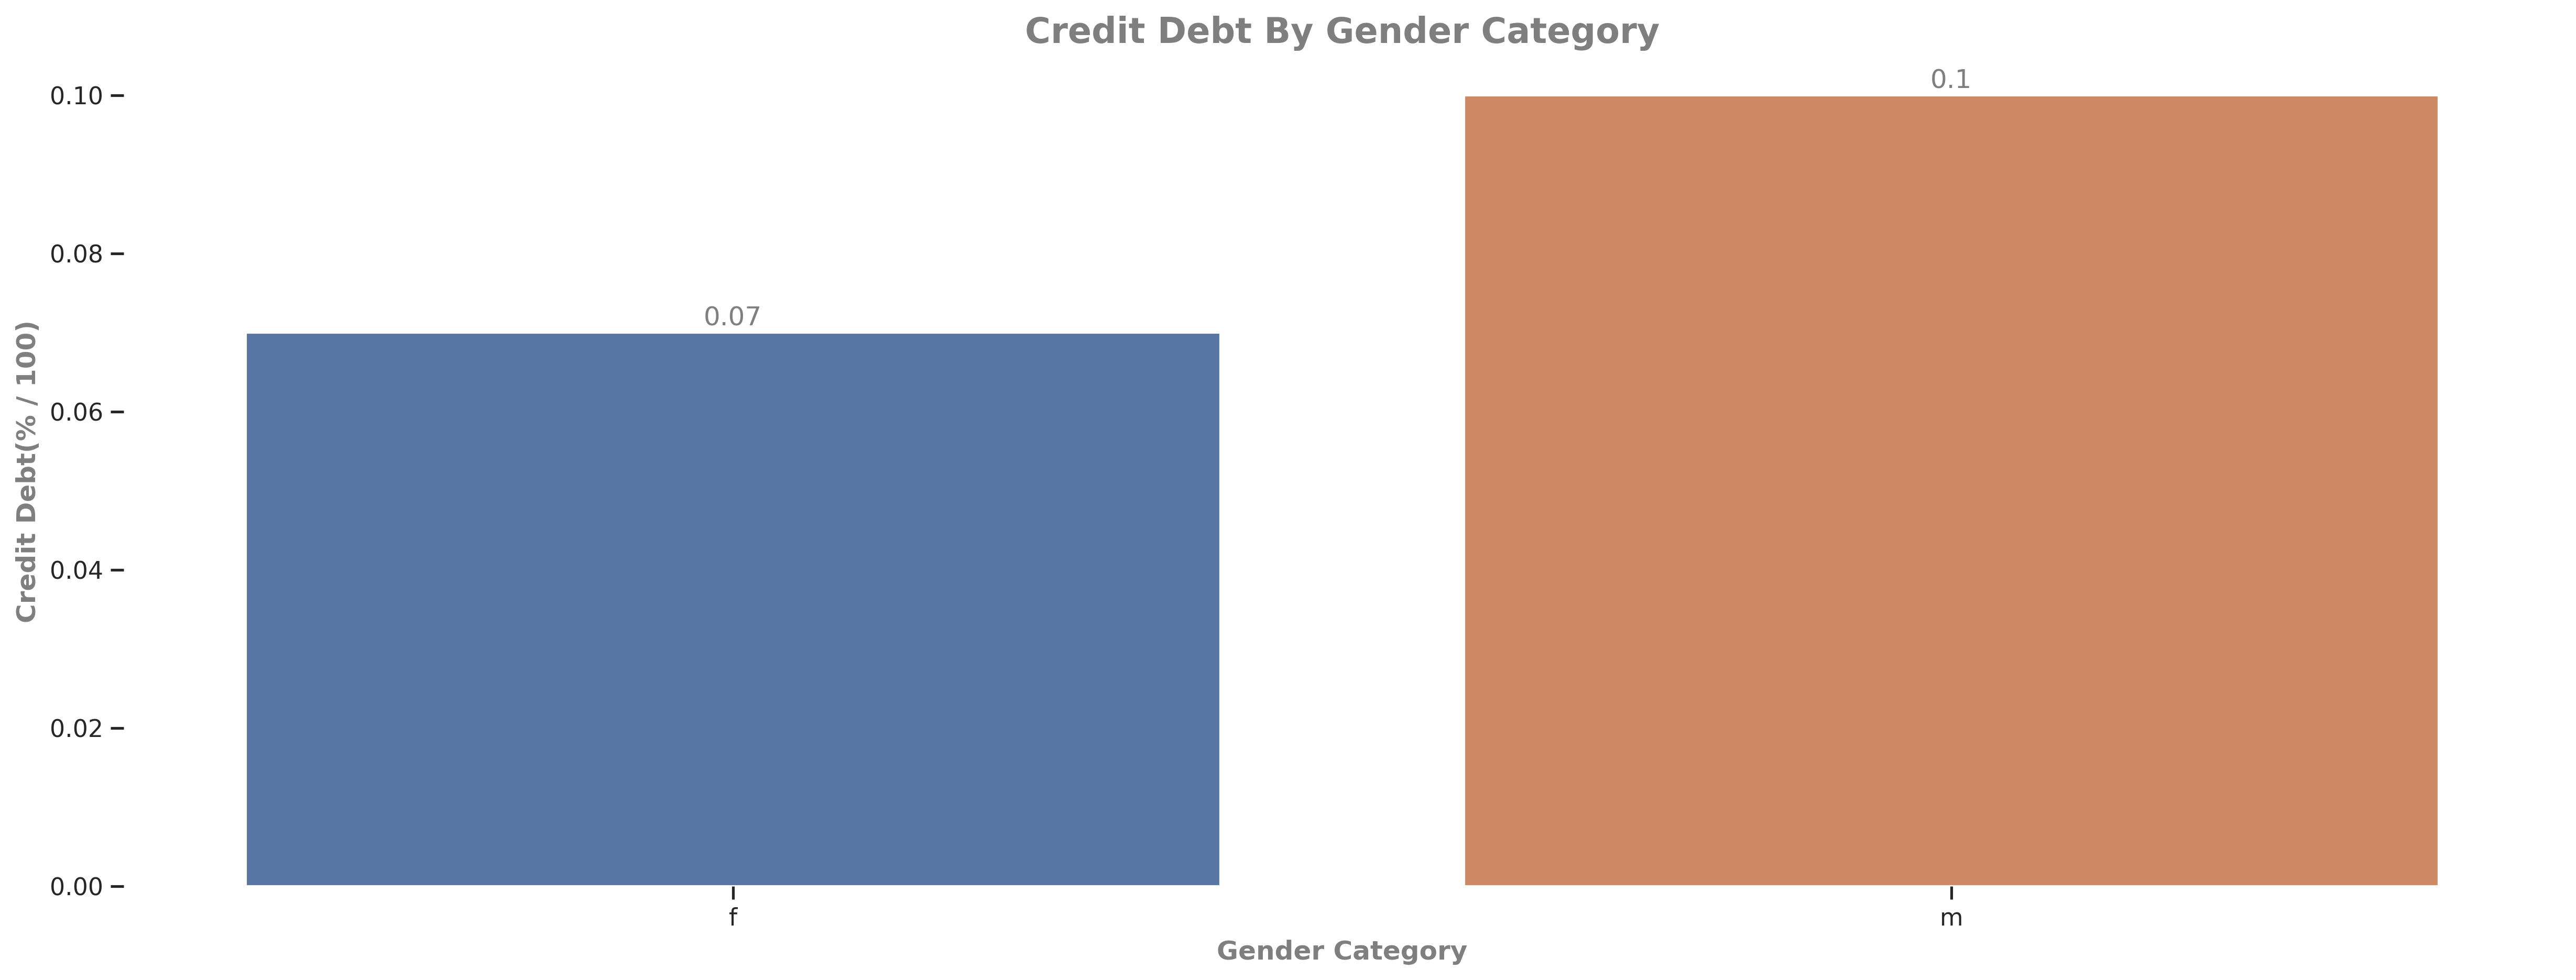

In [ ]:
multivariate_plot(
    df=df_category, x="gender", y="debt", 
    xlabel="Gender Category", ylable="Сredit Debt(% / 100)", 
    heading="Сredit Debt By", bar_label=True
    )

- **Мужчины** имеют задолженности по платежам кредита в **10%**
- **Женщины** лучше - **7%**

### 6.2.6 Total Income Category And Debt

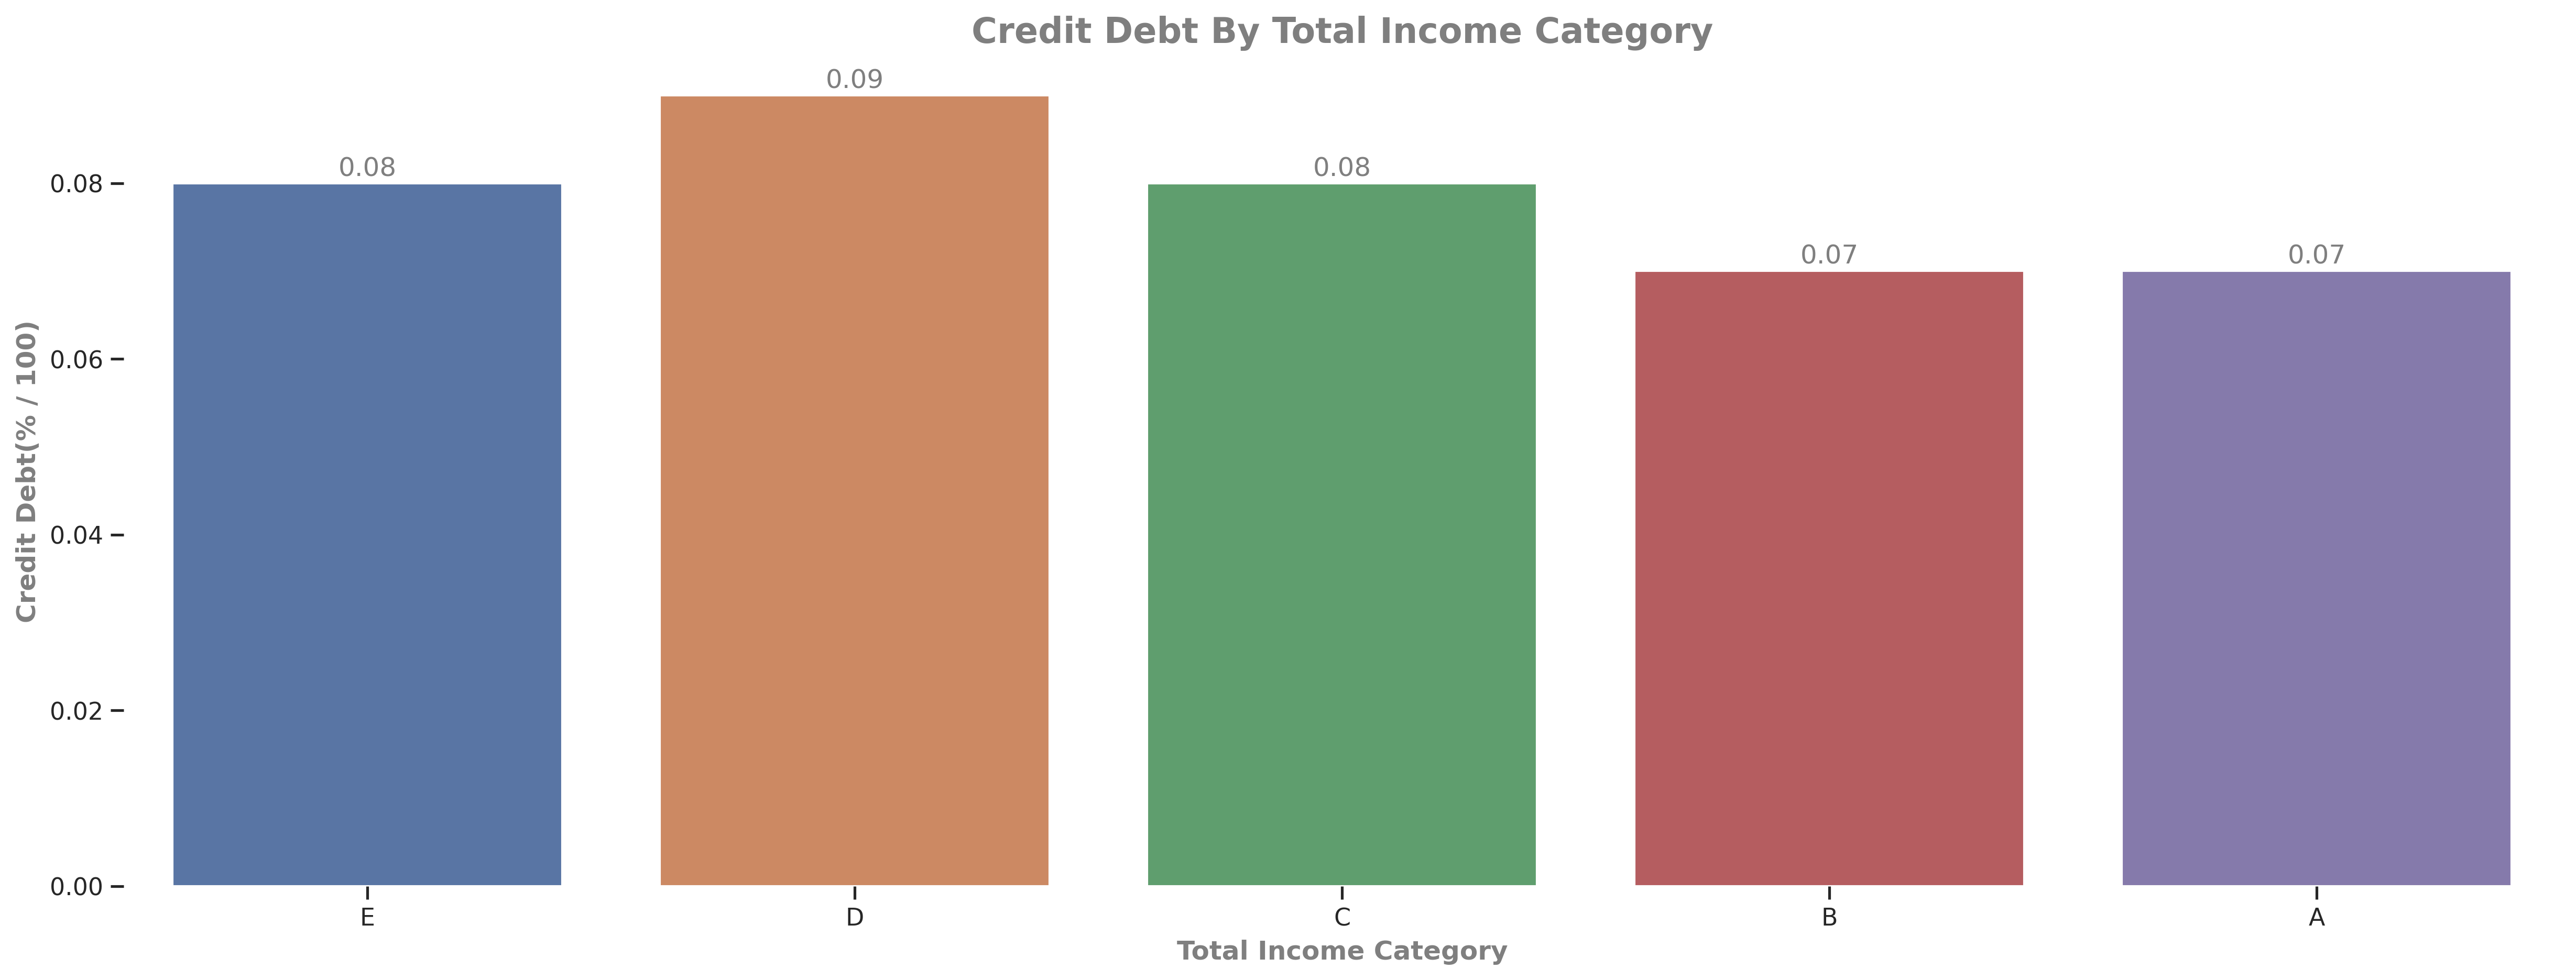

In [ ]:
multivariate_plot(
    df=df_category, x="total_income_category", y="debt", 
    xlabel="Total Income Category", ylable="Сredit Debt(% / 100)", 
    heading="Сredit Debt By", bar_label=True
    )

- категория дохода **D** хуже других - **9%**
- более состоятельные категории **А и В** по **7%**

### 6.2.7 Pearson Correlation

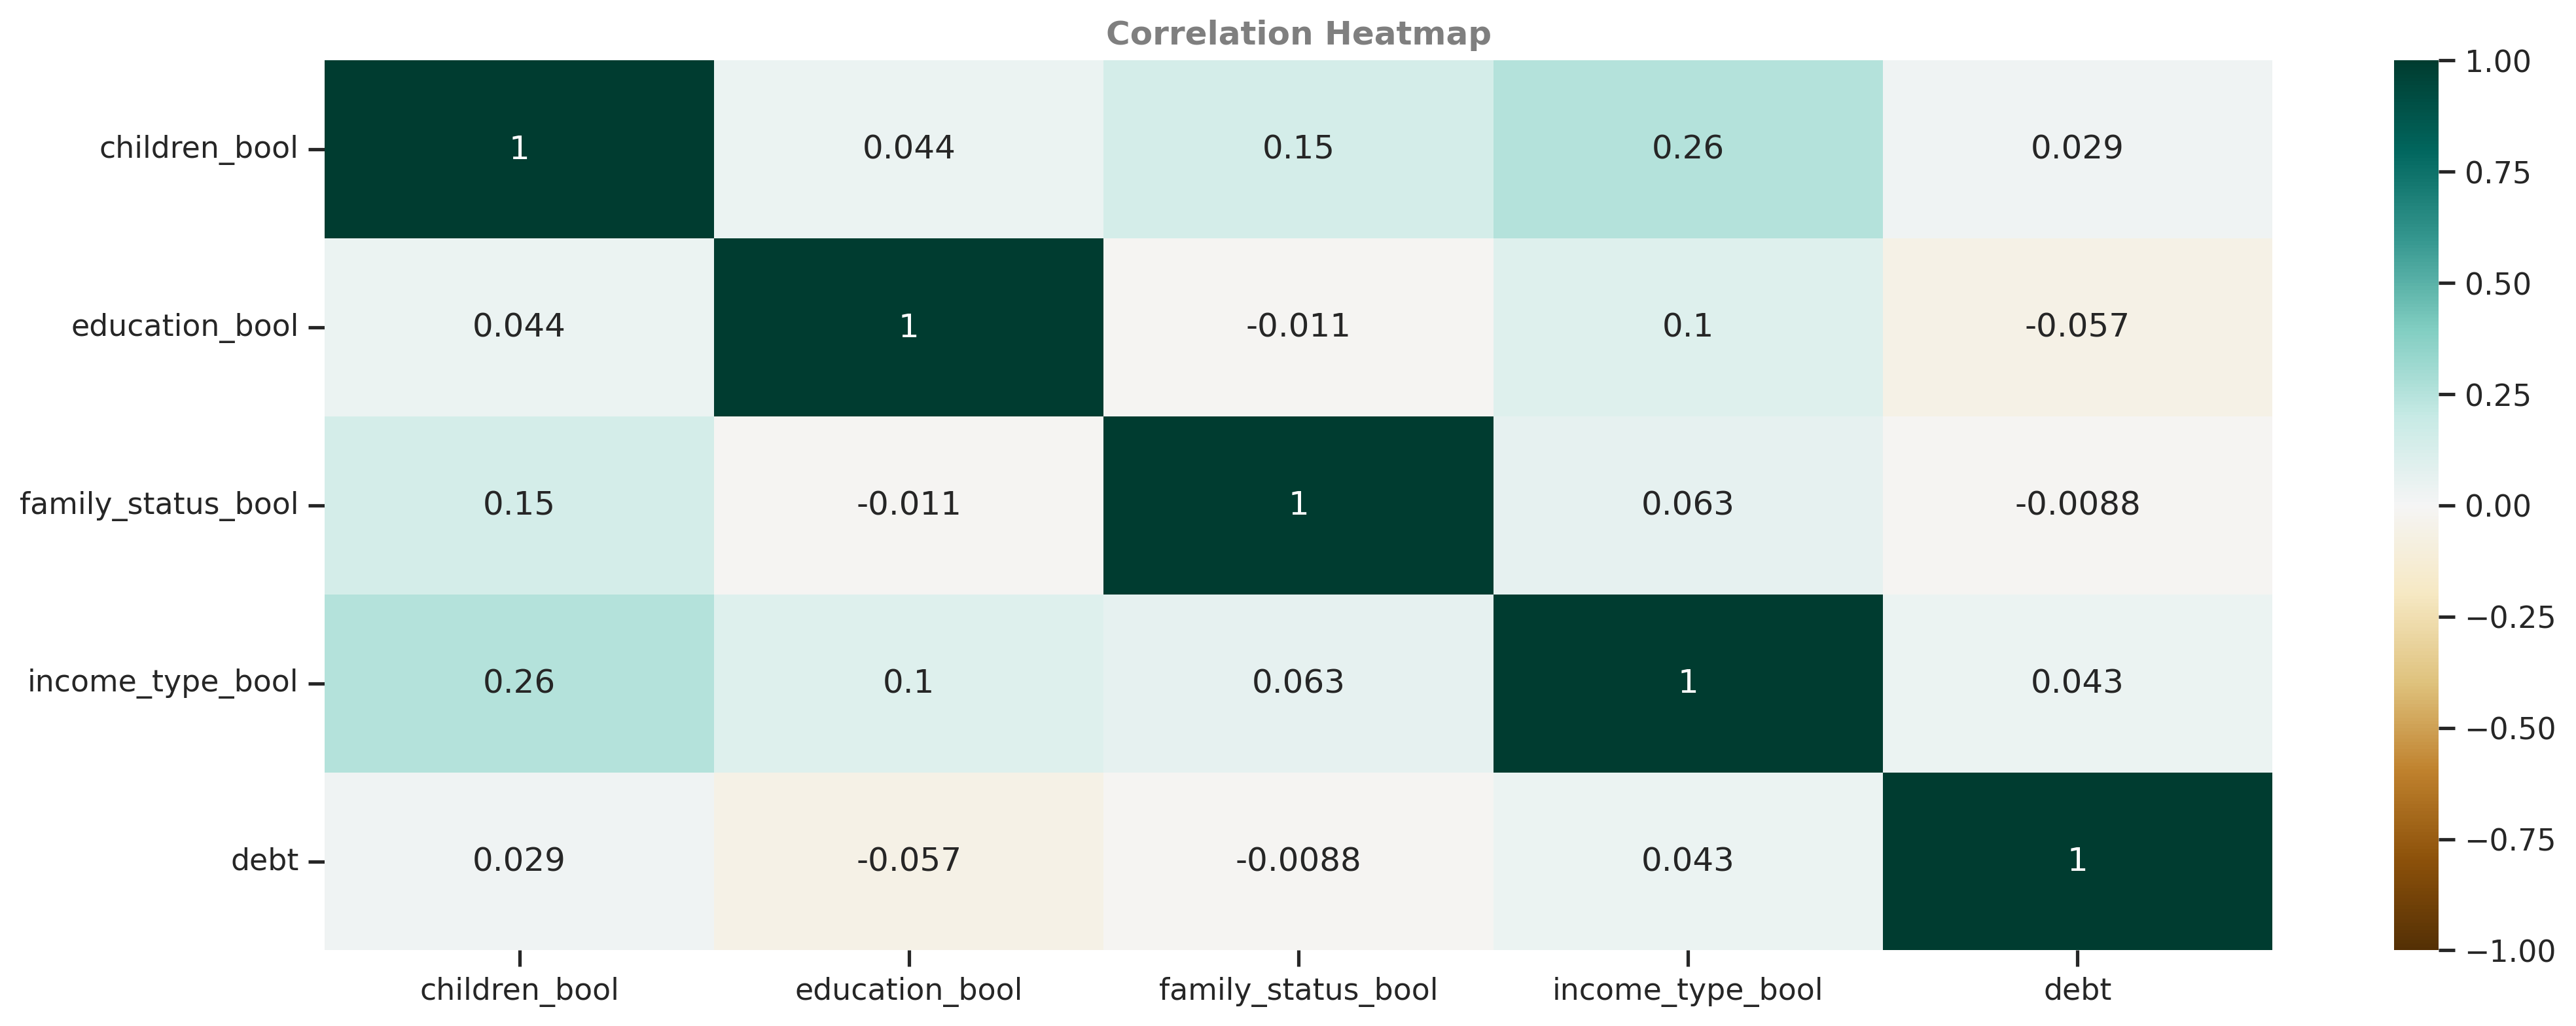

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(bool_table.drop(columns=['id']).corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict=FIG_FONT)
plt.show()

- **Корреляция** между задолженностью и остальными категориями **не обнаружена**.

### 6.2.8 Chidren And Debt

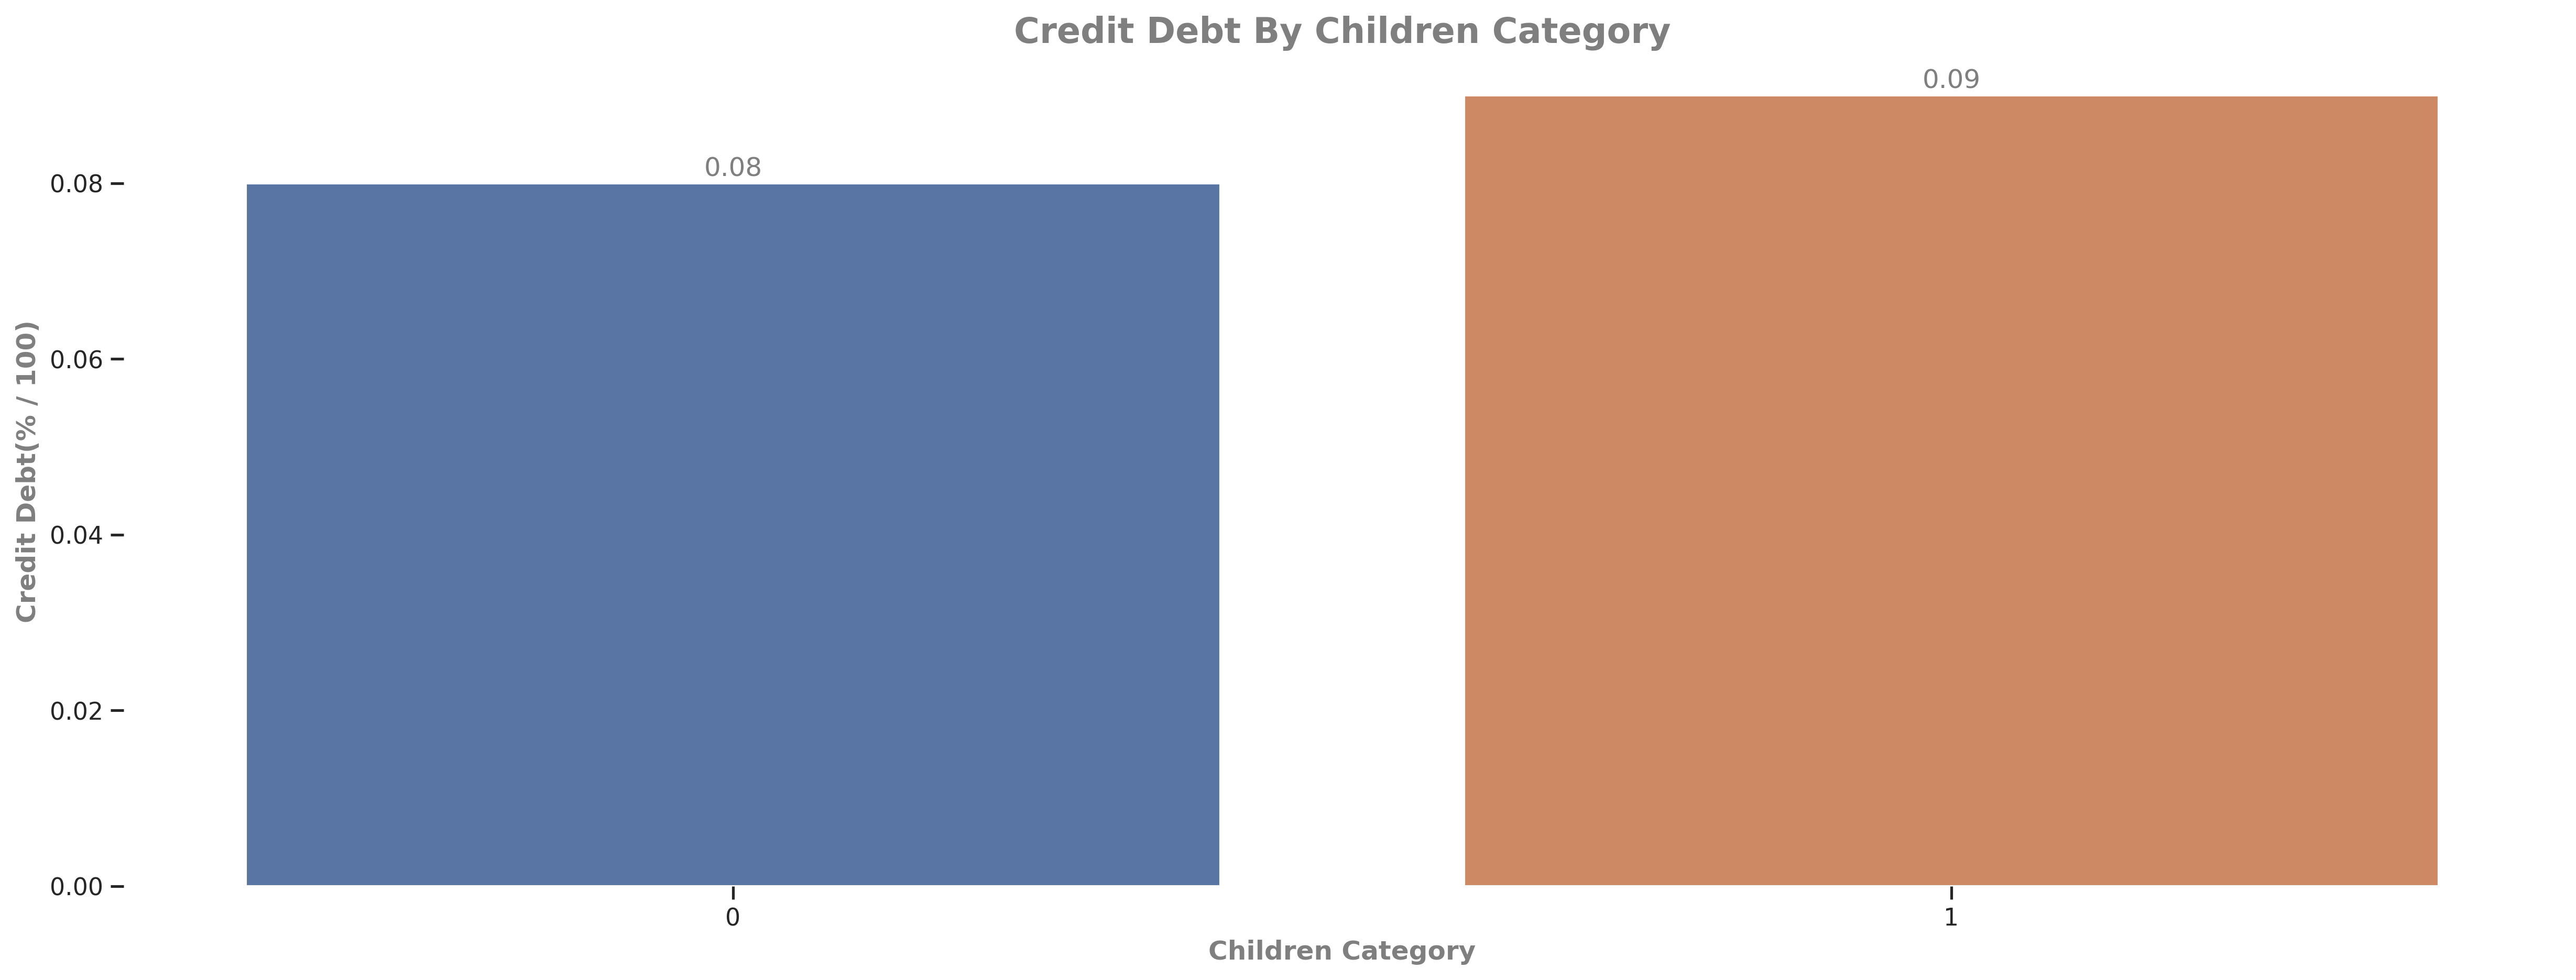

In [ ]:
multivariate_plot(
    df=df_category, x="children_bool", y="debt", 
    xlabel="Children Category", ylable="Сredit Debt(% / 100)", 
    heading="Сredit Debt By", bar_label=True
    )

- Те у кого **есть дети** имеют задолженности по кредиту в **9%**
- Те у кого **нет детей** задолженность **8%**

# 📝 7. Выводы

На основе изученных данных составим **портрет кредитора**:

- Подавляющее большинство тех кто берет кредиты, **имеют среднее образование 76.2%**. Самая популярная **цель кредита** на **операции с недвижимостью 50%**.

- Почти все кредиты взят **женатыми 76,9%**. Кредит **оформляется на женщин** в два раза чаще **66.4%**, чем на мужчин.

- **Пенсионеры** берут кредиты в **18%** случаев. Остальные рабочие люди. **Средний возраст** заемщика **43 года**, большинству 33 - 54 года. 

- Половину кредитов взяли клиенты с **доходом категории D**(в диапазоне 103,545 - 186,413) - **50%**.


Кто **хуже**, а кто **лучше** возвращает кредит:

- Хуже **нет высшего 9%**. Лучше **есть высшее 5%**.

- Хуже **не женат/не замужем 10%**. Лучше **вдовец/вдова и в разводе по 7%**.

- Хуже **для  получения образования и операции с авто по 9%**. Лучше **операции с недвижимостью 7%**.

- Хуже **сотрудник 10%**. Лучше **пенсионер и госслужащий по 6%**.

- Хуже **мужчины 10%**. Лучше **женщины 7%**.

- Хуже **D 9%**. Лучше **А и В по 7%**.

- Хуже **есть дети 9%**. Лучше **нет детей 8%**.

# 💬 Заключение

- В файле было много пропущенных значений около 10%, а также аномальных значений (рабочий стаж более 300 лет), оказалось так заполняли категорию пенсионеров. Удалены явные дубликаты. Пропуски в доходах заполнены медианой, пропуски в раб.стаже медианой с учетом категории работника. Из за аномально высоких значений в доходах, было выбран 98 процентиль и по нему отфильтрована таблица. 
 
- Требовалось создать категории, сделаны категории по целям кредита и по доходам. Также в целях обучения необходимо было декомпозировать таблицу. Было создано 6 словарей. Из общей таблицы лишние значения были удлане, остались только ключи и числовые значения.
 
- В этом проекте требовалось создать что то наподобие модели скоринга которая будет принята во внимание, когда будут создавать модель машинного обучения. Была сделана таблица с булевыми данными, которые были в итоге использованы для построения графиков. 
 
- Сделано много графиков для наглядности, с помощью библиотек sns и plt. Графики завернуты в функции из за частого повторения. 
